### **_GitHub Commit History..._**
#### __https://github.com/MatthewHealy02/AI-Programming-Assessments__

## Package Imports:

In [1]:
# Import tensorflow, pandas and numpy modules;

import tensorflow as tf
import pandas as pd
import numpy as np

# Import DataFrame visualisation modules;

import matplotlib.pyplot as plt
import seaborn as sns

# Import DataFrame preprocessing moduels;

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from tensorflow.keras.utils import to_categorical

# Import Neural Network model packages;

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.initializers import HeNormal, GlorotUniform

# import model evaluation and optimisation packages;

from sklearn.base import BaseEstimator, ClassifierMixin
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

# Import warnings;

import warnings as w

# Import time for model computational efficiency evaluations;

import time as t

# Ignore warnings;

w.filterwarnings('ignore')

# enable eager executions; 

tf.config.run_functions_eagerly(True)

## Functions:

In [2]:
# A function to quickly summarise a pandas DataFrame using {pandas};

def GENERAL_INFO(dataset):

    """.
    
    DISPLAYS A DATA SUMMARY OF A PANDAS DATAFRAME, PARAMETER INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe
    """
    
    st = '''
    structure:
    '''
    print(st)
        
    # the number of rows and columns are displayed with attribute {df.shape};
        
    shape = dataset.shape
        
    # memory usage, null data, data types present and overall structure
    # is displayed with method {df.info()};
        
    structure = dataset.info()
        
    # important statistical values present within each column and 
    # the overall dataset are found using method {df.describe()};
    
    importantvals = dataset.describe()
        
    # the first 5 rows are viewed with method {df.head()};
    
    first5 = dataset.head()
    
    # the last 5 rows are viewed with method {df.tail()};
        
    last5 = dataset.tail()
        
    # the overall count of missing / NaN values are determined by combining
    # {df.isna()} and {df.sum()} methods;
        
    missing = dataset.isna().sum()
        
    # dtypes present are exclusively printed with method {df.dtypes()};
        
    dtypes = dataset.dtypes
        
    # number of unique values present within each column are displayed with
    # method {df.features()};
        
    unique = dataset.nunique()
        
        
    # all of the above info is stored in a multiline string to increase
    # interpretability and this string is printed;
        
    general_info = f''' 
    rows / columns:
        
    {shape}
        
        
    important statistical values: 
        
    {importantvals}
        
        
    first 5 rows:
        
    {first5}
    
    
    last 5 rows:
    
    {last5}
        
        
    missing values (?):
        
    {missing}
        
        
    unique values:
        
    {unique}
        
        
    data types present:
        
    {dtypes}
    '''
        
    print(general_info)


# A function to create histograms using {matplotlib.pyplot};

def HISTOGRAM(dataset, 
              colour, 
              title,
              transparency = 0.9,
              x = 'val',
              y = 'freq',
              fsize_title = 16,
              fsize_label = 12):

    """.
    
    GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value 
    
    fsize_title, fsize_label : any integer value, ideally between 8 and 20
    """

    # {plt.hist()} is used to define key information
    # to be plotted;
    
    plt.figure(figsize = (10, 8))
    plt.hist(dataset, 
             color = colour,
             edgecolor = 'black',
             alpha = transparency)
                            
    # labels are then defined...
        
    plt.title(title,
              fontsize = fsize_title,)
    plt.xlabel(x, 
               fontsize = fsize_label)
    plt.ylabel(y,
               fontsize = fsize_label)
    
    # and the resulting histogram is displayed;
        
    plt.show


# a function to display a bar chart is defined using 
# {matplotlib.pyplot};

def BAR_CHART(dataset, 
              target,
              colour = 'plasma',
              title = 'Distribution',
              x = 'Target',
              y = 'Count',
              fsize_title = 16,
              fsize_label = 12):

    """.
    
    GENERATES A BAR CHART, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...

    
    dataset : pandas dataframe (df)

    target : df column name as a string

    index : df column name as a string
    
    colour : colour as a string
    
    transparency : float value between 0 and 1
    
    title, x, y : any string value 
    
    fsize_(title/label) : font size as an integer
    """
        
    # unique target values and their respective counts are instantiated 
    # to the {distribution} variable;

    dataset = target.reset_index(drop = True)
        
    distribution = target.value_counts()
    
    # size of the chart is defined with matplotlib method {plt.figuire()} accepting
    # a tuple containing x and y dimensions as 2 integers {figsize = (10, 8)};
        
    plt.figure(figsize = (10, 8))
    
    # x and y axis values are assigned using attributes {distribution.index} and {distribution.values}
    # (each representing target names and their respective overall count) correspondingly,
    # palette is selected with parameter {colour} to present the chart within a given 
    # colour palette; 
        
    sns.barplot(x = distribution.index, 
                y = distribution.values,
                palette = colour)
     
    # {title()}, {xlabel()}, and {ylabel()} methods are called to display the title 
    # of the chart and the titles of the x and y axis;
        
    plt.title(title, 
              fontsize = fsize_title)
    
    plt.xlabel(x, 
               fontsize = fsize_label)
    plt.ylabel(y, 
               fontsize = fsize_label)
    plt.xticks(ticks = range(len(distribution.index)),
               labels = distribution.index,
               rotation = 0)
    
    # bar chart is displayed by calling attribute {plt.show};
    
    plt.show


# a function to display the amount of outliers per column is defined
# using {pandas};

def OUTLIER_DETECTOR(dataset, 
                     target):

    """.
    
    DISPLAYS THE AMOUNT OF OUTLIERS PRESENT PER COLUMN
    FOR A GIVEN PANDAS DATAFRAME

    
    dataset : Pandas DataFrame
    
    target : target column as a string
    """

    # instantiate a version of the DataFrame without the target column to
    # the variable {outlier_detection};
        
    outlier_detection = dataset.drop(columns = [target])
        
    # use method {df.quantile()} to determine the lower quartile;
        
    Q1 = outlier_detection.quantile(0.25)
        
    # and repeat to find the higher quartile;
        
    Q3 = outlier_detection.quantile(0.75)
        
    # calculate interquartile range by subtracting the lower quartile
    # from the higher quartile;
        
    IQR = Q3 - Q1
        
    # detect outliers by first setting an upper and lower bound limit,
    # then instantiate any values that sit above or below this bound to 
    # the variable {outliers} as a tuple;
        
    outliers = ((outlier_detection < (Q1 - 1.5 * IQR)) | 
                (outlier_detection > (Q3 + 1.5 * IQR)))
        
    # calculate the total number of outliers present within tuple {outliers}
    # and instantiate this value to the variable {outlier_total};
        
    outlier_total = outliers.sum()
        
    # store this data in an interpretable manner within a multi-line
    # f-string...
        
    outlier_info = f'''outliers per column: 
        
    {outlier_total}'''
        
    # ...and display these results;
        
    print(outlier_info)  

# a function to one-hot encode a DataFrame feature in the form
# of a numpy array is defined leveraging {keras} and {numpy};


def ONEHOT_ENCODE(target):

    """.
    
    ONE-HOT ENCODES AN INPUT TARGET USING
    KERAS [to_categorical()] FUNCTION, PARAMETER INPUT
    IS:


    target : target as a numpy array

    RECCOMMENDED FOR DATA PREPARATON TASKS PERTAINING
    TO THE TRAINING OF NEURAL NETWORK MODELS
    """
    
    target = to_categorical(target,

                            # set the number of classes dynamically leveraging numpy {.unique()}
                            # method and the builtin {len()} function to return the amount of
                            # unique classes within the target;
                           
                            num_classes = (len(np.unique(target))))

    # return the resulting array;
    
    return target


# a function to generate a confusion matrix visual to evaluate
# classification ML models;

def CONFUSION(dataset):

    
    """.
    
    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.
    
    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values' 
    """   

    # actual values are stored in variable {actual};
    
    actual = dataset['Actual Values']

    # predicted values are stored in variable {predicted};
    
    predicted = dataset['Predicted Values']

    # confusion matrix of {actual} and {predicted} values is instantiated
    # to variable {cm};
    
    cm = confusion_matrix(actual,
                          predicted)

    # display labels are instantiated to variable {dl}, and are
    # deciphered by creating an organised list of unique values
    # present in the column {dataset['Predicted Values']};

    dl = sorted(list(dataset['Actual Values'].unique()))

    # the heatmap is then stored in vairable {cm_display};
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                        display_labels = dl)

    # and displayed using {matplotlib} methods {.plot()}
    # and function {plt.show()};
    
    cm_display.plot()
    plt.show() 

## Loading the Dataset:

In [3]:
# pandas method {pd.read_csv()} is used to instantiate 
# {'glass_data.csv'} to the variable {df_glass};

df_glass = pd.read_csv('glass_data.csv')

## Exploratory Data Analysis:

In [4]:
help(GENERAL_INFO)

Help on function GENERAL_INFO in module __main__:

GENERAL_INFO(dataset)
    .

    DISPLAYS A DATA SUMMARY OF A PANDAS DATAFRAME, PARAMETER INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe



In [5]:
# function {GENERAL_INFO()} is used to output 
# key information on the dataset;

GENERAL_INFO(df_glass)


    structure:
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
 
    rows / columns:
        
    (214, 11)
        
        
    important statistical values: 
        
                   id          ri          na          mg          al          si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   7

## Check the DataFrame:

In [6]:
df_glass

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Visualisations:

### _class imbalance exploration..._

#### **[id number]**

In [7]:
help(HISTOGRAM)

Help on function HISTOGRAM in module __main__:

HISTOGRAM(dataset, colour, title, transparency=0.9, x='val', y='freq', fsize_title=16, fsize_label=12)
    .

    GENERATES A HISTOGRAM, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe

    colour : colour as a string

    transparency : float value between 0 and 1

    title, x, y : any string value

    fsize_title, fsize_label : any integer value, ideally between 8 and 20



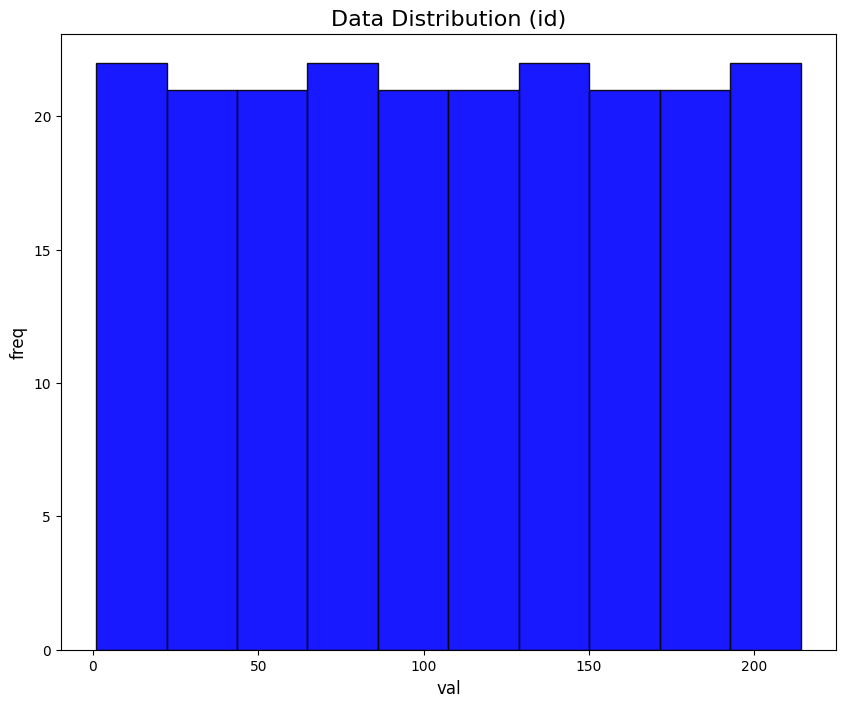

In [8]:
# function {HISTOGRAM()} is used to generate histograms to display
# data distribution across each column;

HISTOGRAM(dataset = df_glass['id'], 
          colour = 'blue', 
          title = 'Data Distribution (id)')

#### **[refractive index]**

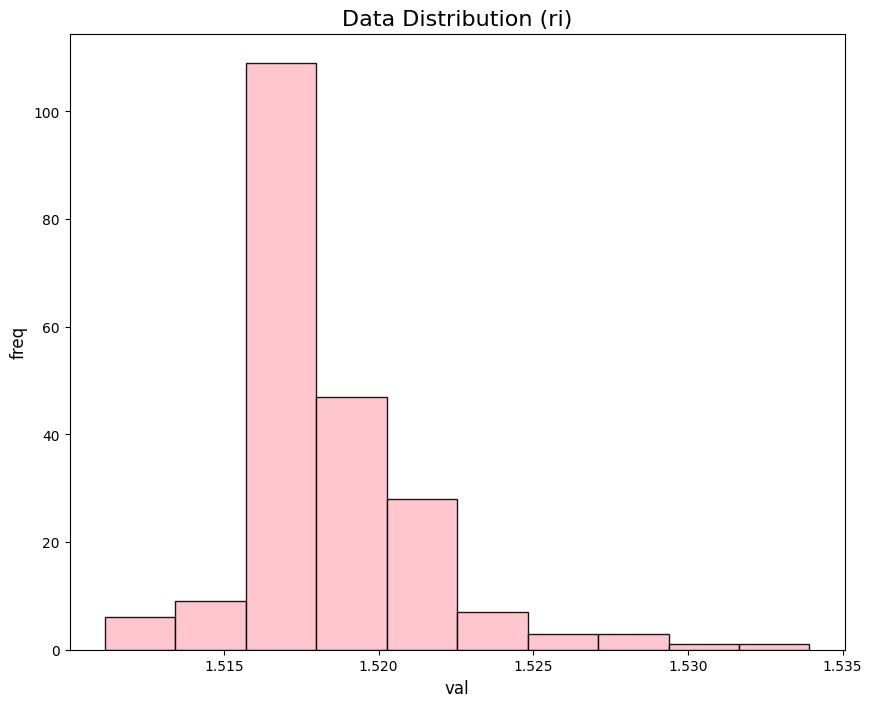

In [9]:
# columns with hierarchical "score" values are represented with pink; 

HISTOGRAM(dataset = df_glass['ri'], 
          colour = 'pink', 
          title = 'Data Distribution (ri)')

#### **[sodium]**

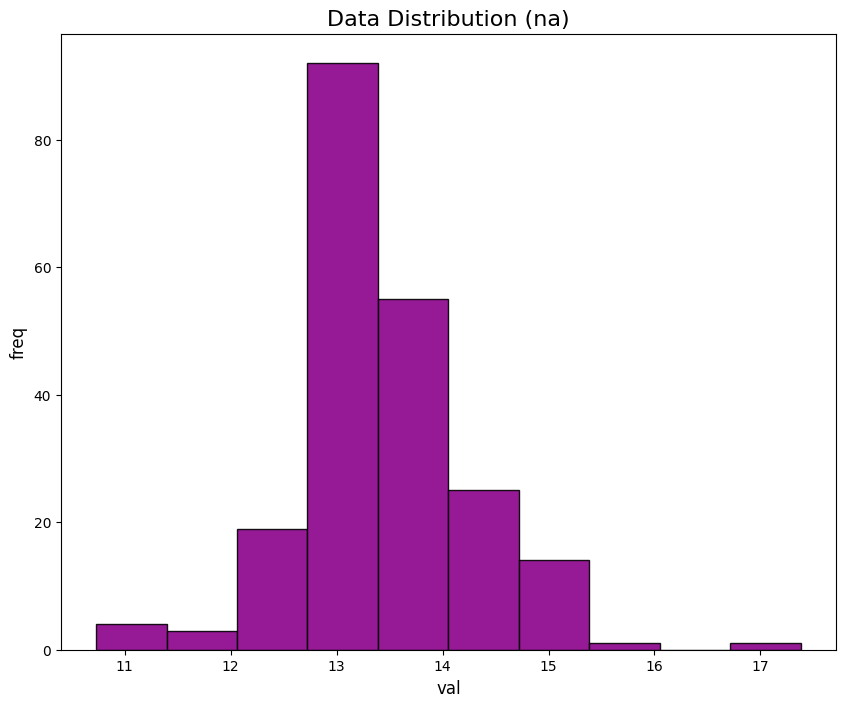

In [10]:
# alkali metals are represented with darkmagenta;

HISTOGRAM(dataset = df_glass['na'], 
          colour = 'darkmagenta', 
          title = 'Data Distribution (na)')

#### **[magnesium]**

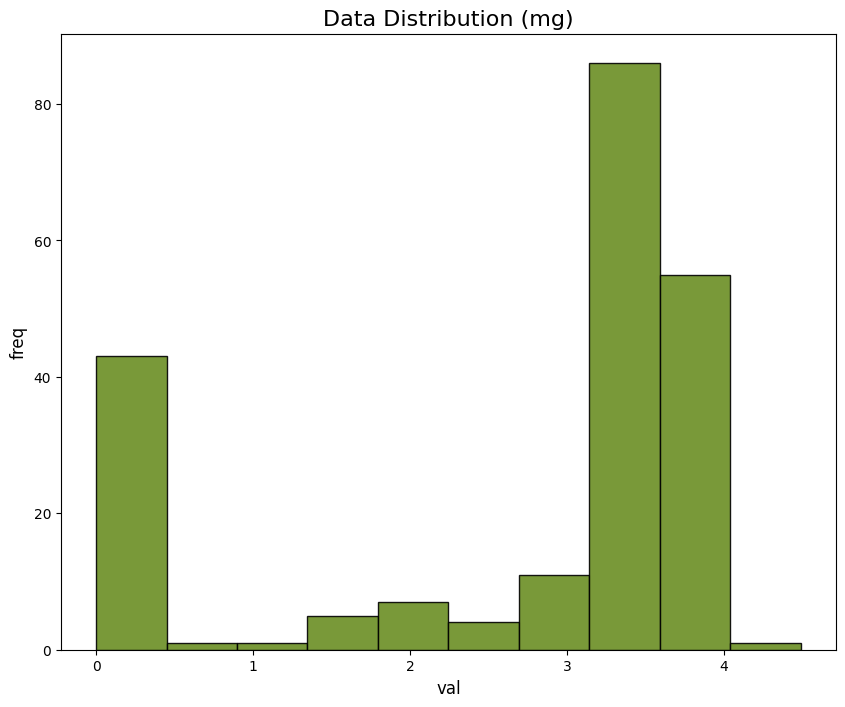

In [11]:
# alkaline earth metals are represented with olivedrab;

HISTOGRAM(dataset = df_glass['mg'], 
          colour = 'olivedrab', 
          title = 'Data Distribution (mg)')

#### **[aluminium]**

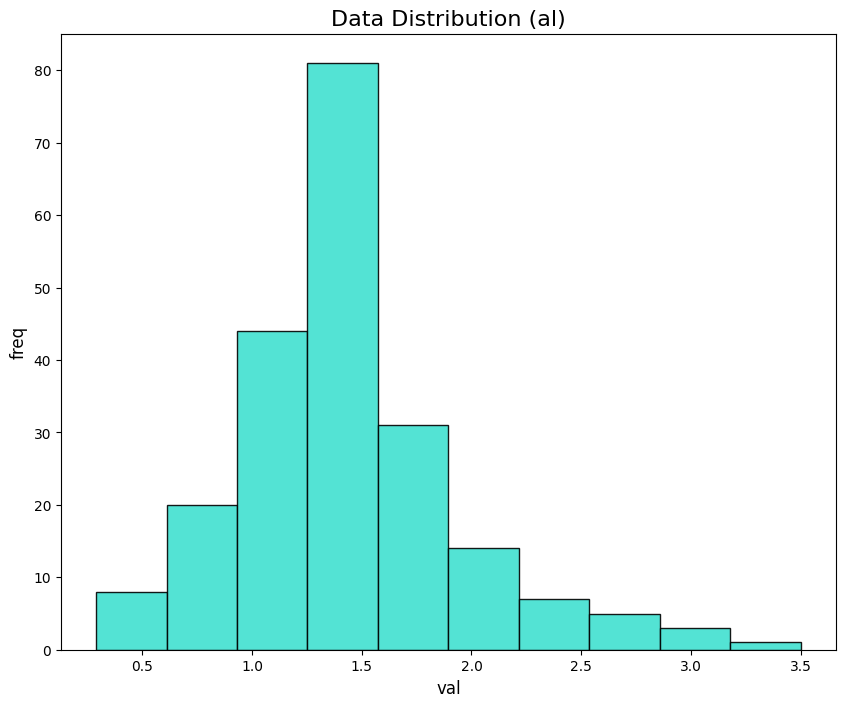

In [12]:
# boron elements are represented with turquoise;

HISTOGRAM(dataset = df_glass['al'], 
          colour = 'turquoise', 
          title = 'Data Distribution (al)')

#### **[silicon]**

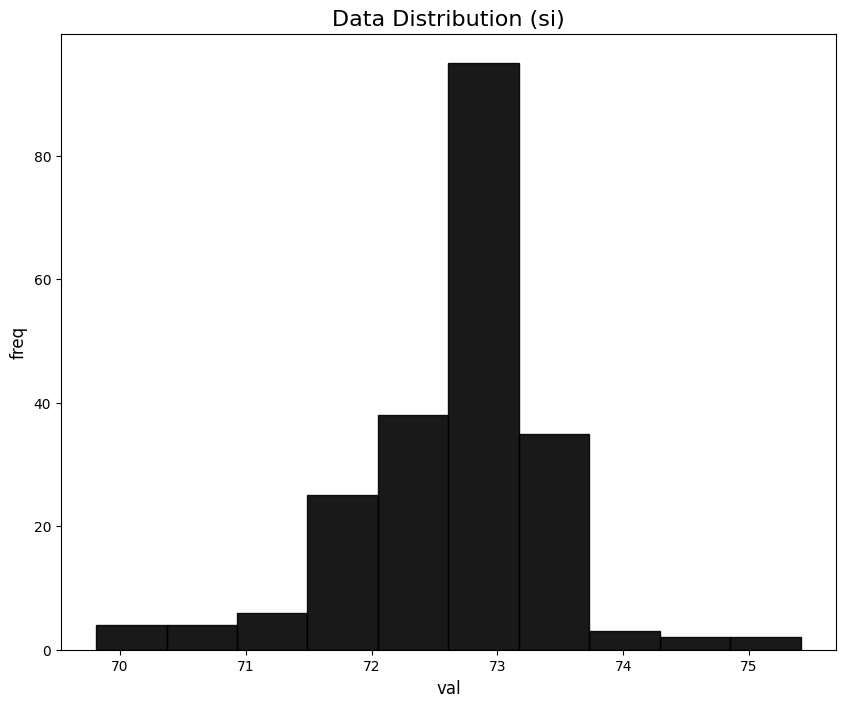

In [13]:
# carbon elements are represented with black;

HISTOGRAM(dataset = df_glass['si'], 
          colour = 'black', 
          title = 'Data Distribution (si)')

#### **[potassium]**

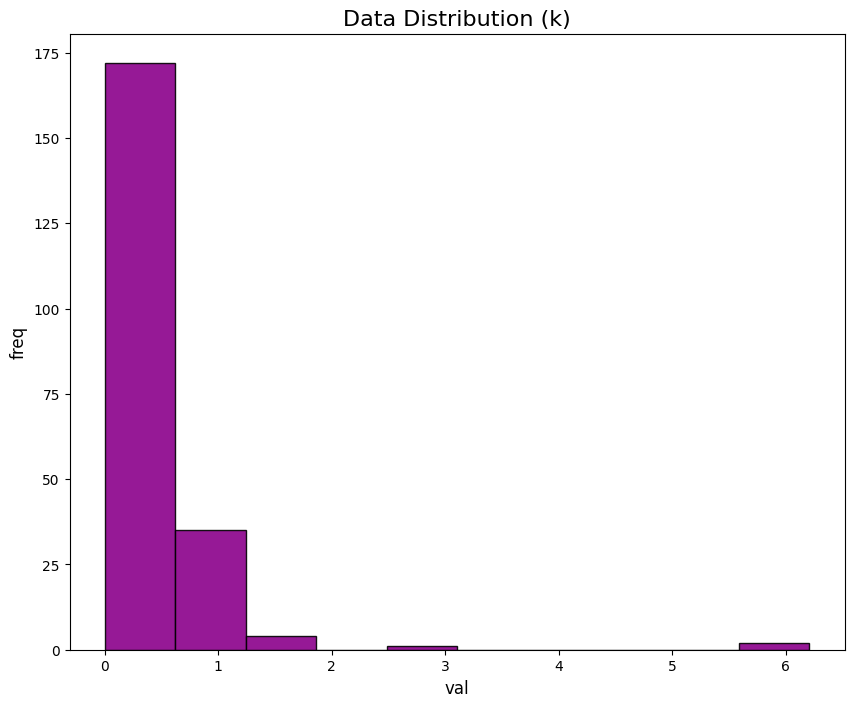

In [14]:
# alkali metal...

HISTOGRAM(dataset = df_glass['k'], 
          colour = 'darkmagenta', 
          title = 'Data Distribution (k)')

#### **[calcium]**

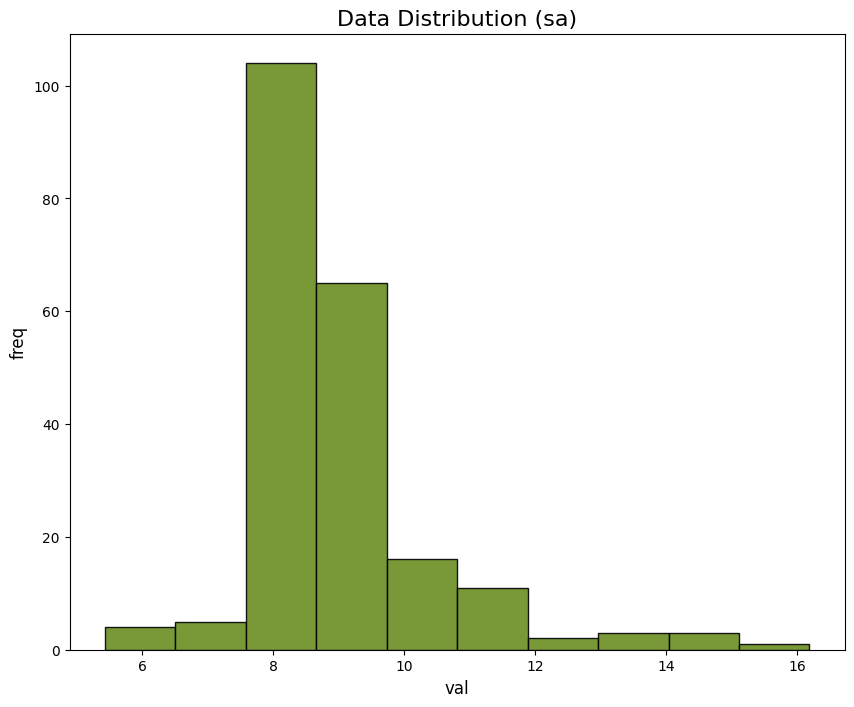

In [15]:
# alkaline earth metal...

HISTOGRAM(dataset = df_glass['ca'], 
          colour = 'olivedrab', 
          title = 'Data Distribution (sa)')

#### **[barium]**

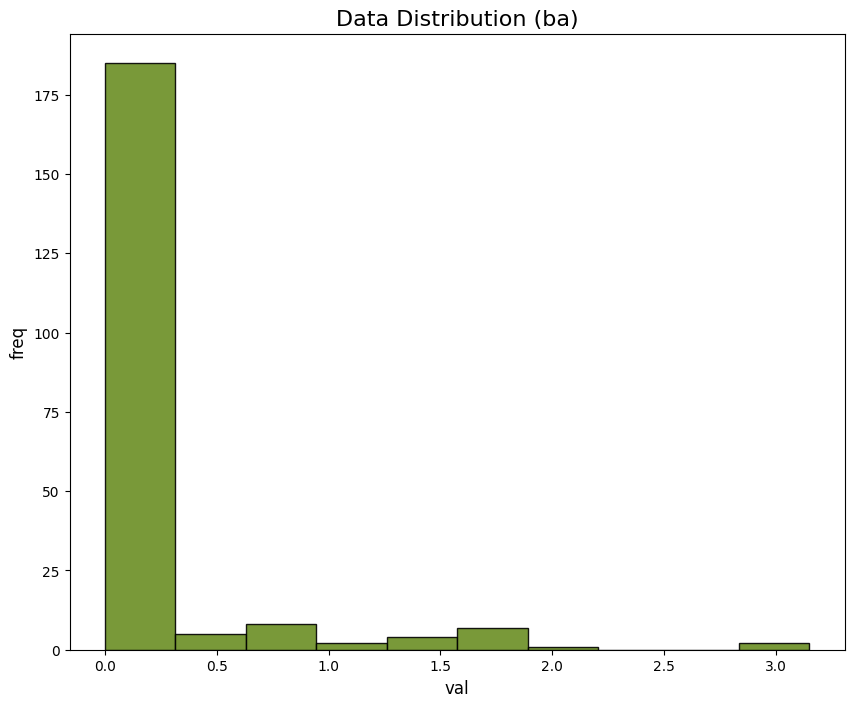

In [16]:
# alkaline earth metal...

HISTOGRAM(dataset = df_glass['ba'], 
          colour = 'olivedrab', 
          title = 'Data Distribution (ba)')

#### **[iron]**

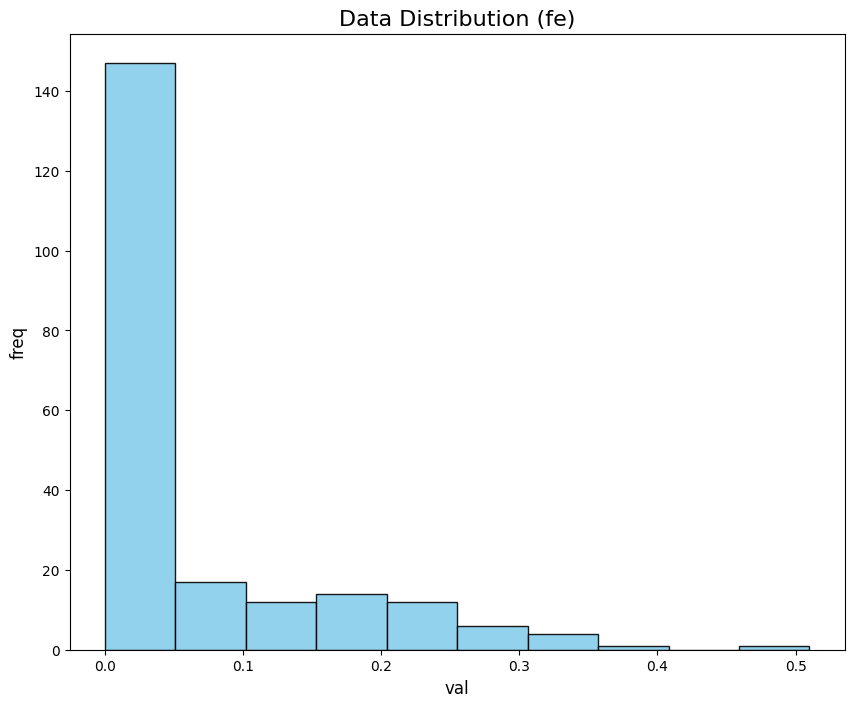

In [17]:
# transition metals are represented with skyblue;

HISTOGRAM(dataset = df_glass['fe'], 
          colour = 'skyblue', 
          title = 'Data Distribution (fe)')

#### **[type of glass]**

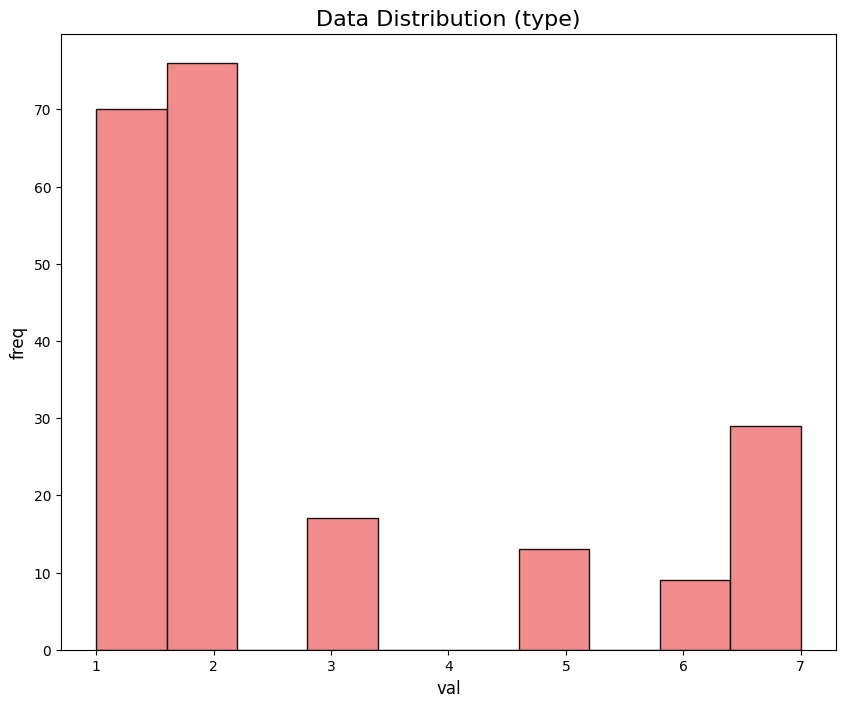

In [18]:
# nominal/categorical columns are represented with lightcoral;

HISTOGRAM(dataset = df_glass['type'], 
          colour = 'lightcoral', 
          title = 'Data Distribution (type)')

In [19]:
help(BAR_CHART)

Help on function BAR_CHART in module __main__:

BAR_CHART(dataset, target, colour='plasma', title='Distribution', x='Target', y='Count', fsize_title=16, fsize_label=12)
    .

    GENERATES A BAR CHART, PARAMETER DTYPE INPUTS ARE AS FOLLOWS...


    dataset : pandas dataframe (df)

    target : df column name as a string

    index : df column name as a string

    colour : colour as a string

    transparency : float value between 0 and 1

    title, x, y : any string value

    fsize_(title/label) : font size as an integer



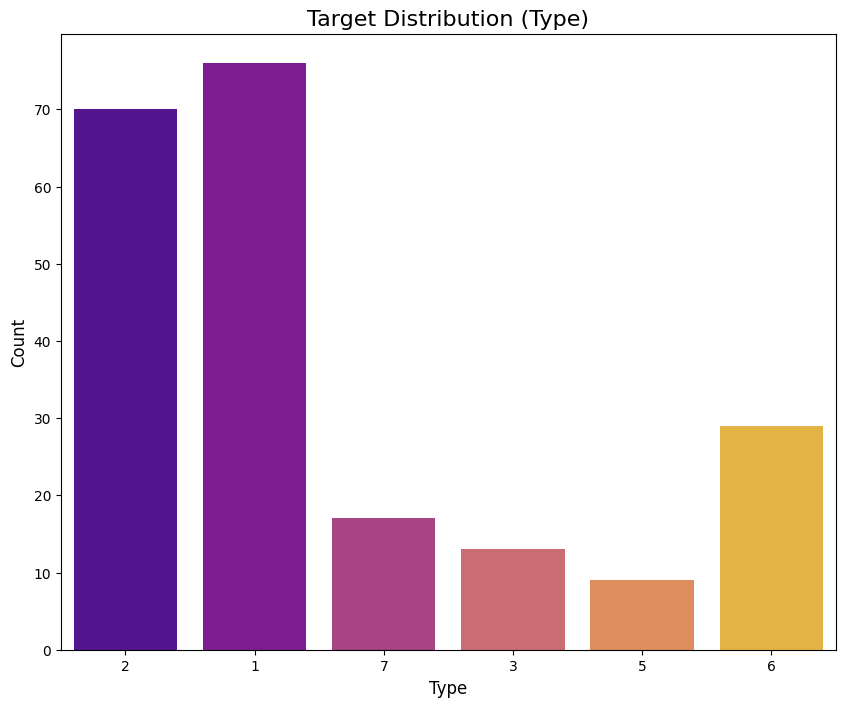

In [20]:
# considering the overall amount of different unique value names is quite low
# in this column, a bar chart would more appropriately represent this column in a more
# interpretable fashion;

BAR_CHART(dataset = df_glass, 
          target = df_glass['type'],
          title = 'Target Distribution (Type)',
          x = 'Type')

<Axes: ylabel='count'>

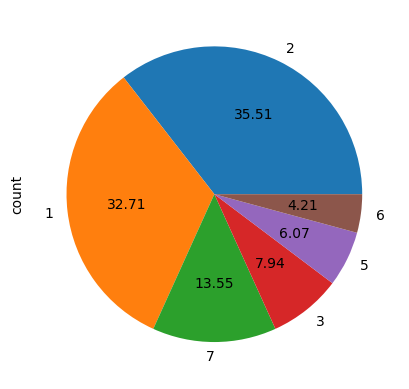

In [21]:
# an additional pie chart is also generated to supplement the visual
# analysis of the target column {type}

df_glass['type'].value_counts().plot.pie(autopct = '%.2f')

In [22]:
# a list containing column names of each insightful feature is 
# instantiated to variable {columns}

columns = ['ri',
           'na',
           'mg',
           'al',
           'si',
           'k',
           'ca',
           'ba',
           'fe',
           'type']

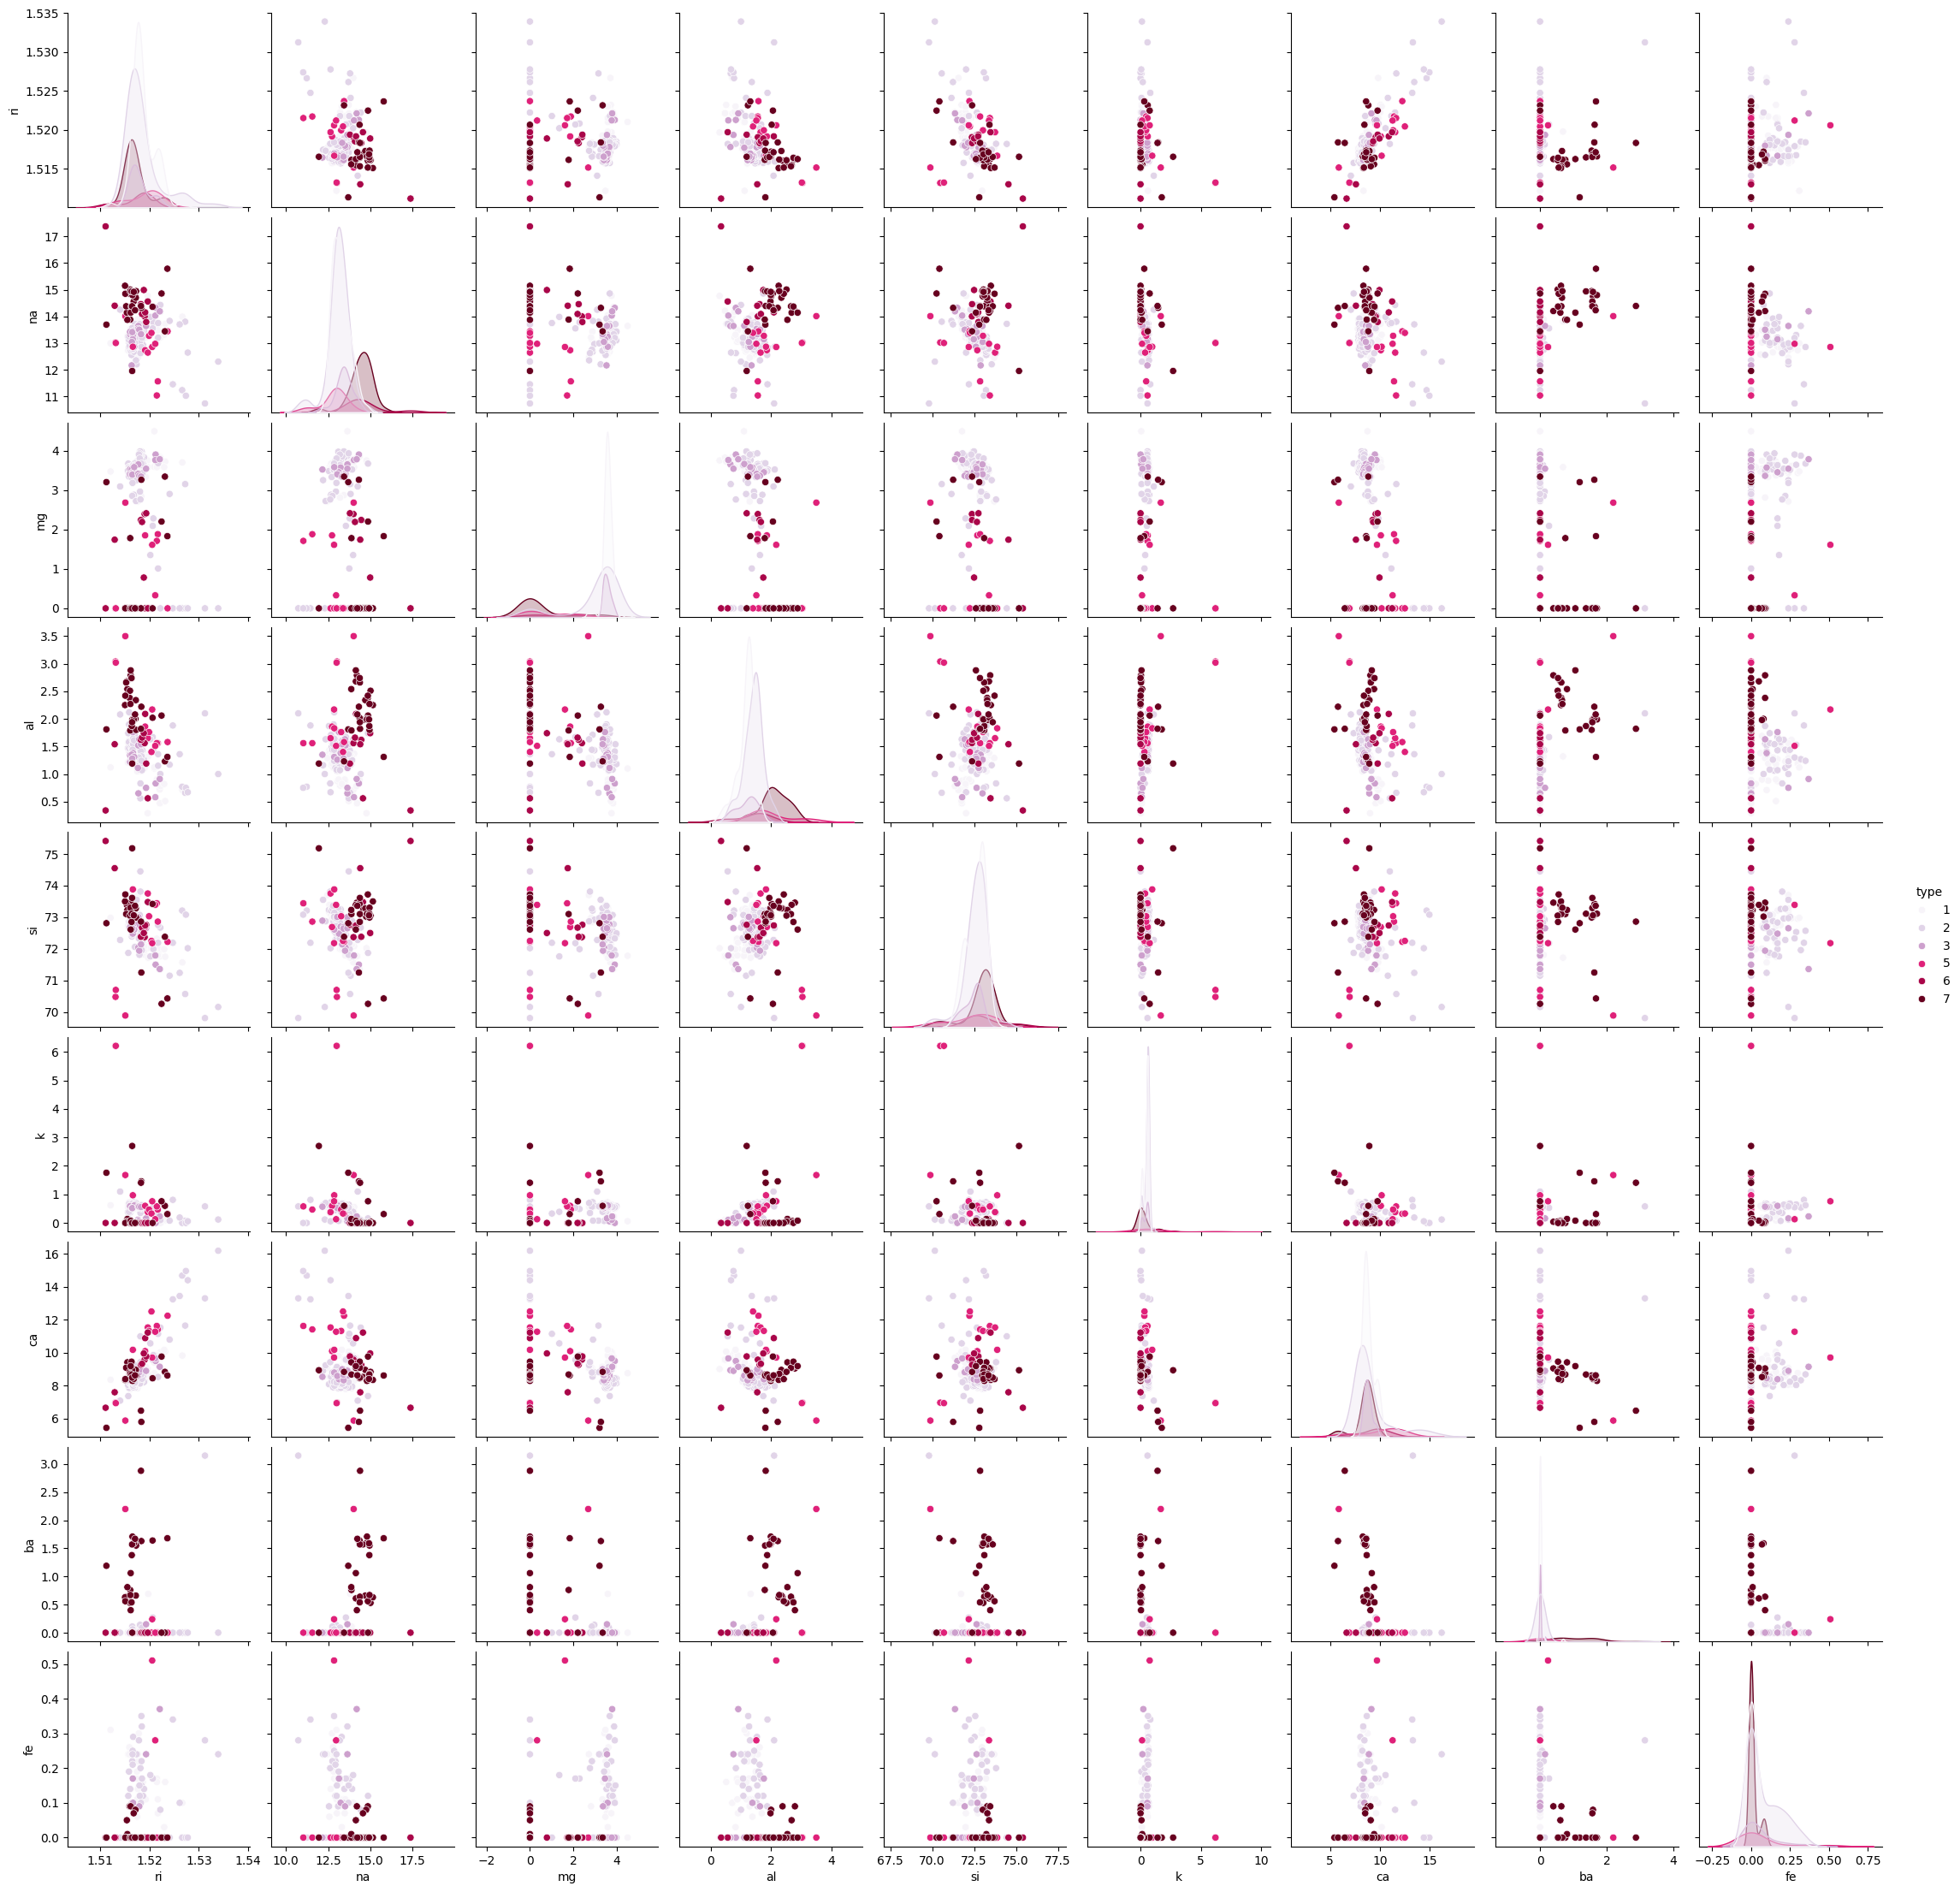

In [23]:
# a pairplot displaying correlated groupings is generated
# with variable {columns};

sns.pairplot(df_glass[columns],
             hue = 'type',
             palette = 'PuRd')

plt.show()

## **some direct linear relationships are visible within the above scatterplot, for instance...**

#### _window types with low levels of calcium feature a much lower refractive index, some window types also fit within a tighter calcium range than others, for instance type 1 features varying levels of calcium, whereas type 7 does not exceed a value of 10 for this feature_
#
#### type 1 features somewhat larger quantities of each element
#### type 2 is very similar to type 1 however they differ in **[magnesium, calcium, barium]** levels, wherein type 2 features drastically lower values for these elements than type 1
#### type 3 feature similar **[aluminium, sodium, potassium]** levels to type 7, and similar **[magnesium]** to type 2
#### type 5 feature extremely low values for each element
#### type 6 feature extremely low values for each element
#### type 7 features very little of each element except for iron, of which is featured more than within any other feature, features a barium value close to 0
#
#### while very few scatterplots present in the above pairplot depict a direct linear relationship between variables, more complex, non-linear relationships are clearly present as the different types tend to form non linear shapes and clusters. 

In [24]:
# a correlation matrix is instantiated to variable {correlation_matrix} using
# pandas method {df.[targets]corr()}

correlation_matrix = df_glass[columns].corr()

correlation_matrix

,ri,na,mg,al,si,k,ca,ba,fe,type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

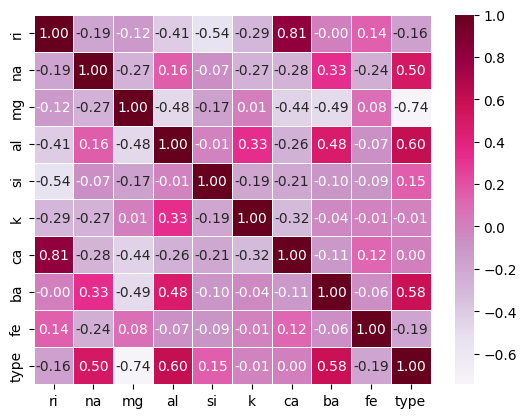

In [25]:
# which is then displayed using seaborn method {heatmap()};

sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'PuRd',
            fmt = '.2f',
            linewidths = 0.5)

## **Results...**
### _DTYPES :_ 
#### - there are no categorical dtypes present within the dataset
#### - most columns consist of float dtypes with only two columns, ('id' and 'type') consisting of integers
#### - while column 'type' consists of integers, the classes within this column are nominal, and as such should not be represented by integers as it implies the classes are of an ordinal nature
#
### _SHAPE :_
#### - the dataset has 214 rows and 11 features before preprocessing
#
### _NOTABLE STATISTICAL OBSERVATIONS :_
#### - **[id]**, this column features an extreme standard deviation value of 62, and extreme variance with a minimum value of 1 and a maximum of 214
#### - **[potassium, calcium, barium, iron]**, the mean value of these columns incline heavily towards to the minimum value than the maximum, suggesting the presence of outliers, **[magnesium]**, while having a less extreme inclination towards the minimum value, nevertheless features a mean value which has an inclination towards the minimum.
#### - **[type]**, this column features a standard deviation value of 2.1, while not being extreme is considerably higher than the avaerage standard deviation value found across each column
#### - there is a high positive correlation between calcium levels and refractive index,
#### - there is a notable positive correlation between features **[sodium, aluminium]** and feature **[type]**
#### - there is a notable positive correlation between **[calcium]** and **[refractive index]**, suggesting that **[calcium]** levels likely determine how much light is refracted within a given type of window.
#### - there is a notable negative correlation between feature **[magnesium]** and feature **[type]**
#### - **[potassium, barium, iron]** have no linear correlation with the target variable **[type]**
#
### __the findings of the EDA strongly suggest an imbalance of classes within the target feature **[type]**__
### __further exploration of each features mean value and the dataset correlation matrix also imply the defining characteristics of some classes, for example...__
#### - _It was found that the mean value for all alkaline earth metal columns incline greatly towards the minimum value, these mean values for these columns could instead be a direct result of class imbalance within the target: **[type]**, as one type of window types could likely be manufactured primarily by utilising these materials, and if that type were to be underrepresented, it would result in deviating mean values within other columns_ 
#### - _the high positive correlation between **[sodium, aluminium]** and **[type]** heavily indicate that these two elements likely define a specific window type, of which is being overly represented within the dataset_
#### - _the negative correlation found between **[magnesium]** and **[type]** indicates that magnesium levels also greatly determine what type of window a given row represents, and that the specific window type that features high magnesium levels is also being underrepresented_
#
### _MISSING VALUES :_
#### - there are no missing values within this dataset
#
### _UNIQUE VALUES :_
#### - there are 34 unique values in column **[barium]** and 32 in **[iron]**, this is interesting as both features are ordinal, and considering the dataset contains 214 rows in total this is a relatively low number
#### - the **[type]** column supposedly contains 7 classes according to the data dictionary provided in the exam brief, however only 6 unique values are present in the actual dataset, this will need to be explored further to determine which class specifically is absent
#
## **key insights gained...** 
- while there are no categorical dtypes present within the dataset, the **[type]** column should be one-hot encoded as the classes within this column are of a nominal nature, and in their current state, a machine learning model would interpret them to be of an ordinal nature and as such would arbitrarily assign higher importance to higher integer values.
#
- the **[id]** column serves no purpose other than to uniquely identify each row, as pandas dataframes automatically index each row, there is no need for this column and its presence would only confuse results output from a machine learning model, especially considering its extreme statistical values, and should be omitted.
#### 
- columns **[potassium, calcium, barium, iron]** feature mean values which incline heavily towards the minimum value, this could imply the presence of outliers within the dataset, or it could be the result of an imbalanced feature; such as the target column **[type]**. This column should be resampled to flatten the distribution. As the **[type]** column is our target variable within the context of a classification problem, resampling is necessary to ensure accurate and reliable results are output from a neural network classifier, and could likely fix many issues pertaining to class imbalance and outlier presence within the dataset in its current state.
#### 
- **[potassium, barium, iron]** have no direct linear relationship with the target variable **[type]**, however, this could just mean that the relationship between these columns and the target are more complex; if so a neural network methodology would be best suited to understanding and interpreting such a relationship.
#### 
- the lack of unique values present within columns **[barium, iron]** should be explored further as it likely also indicates that a class within the target column: **[type]** is defined by these features and is being underrepresented, the absence of a class within the **[type]** column should also be explored.
#### 
- a neural network classifier is the ideal machine learning methodology in the context of this problem. There are little instances of simple direct linear relationships between variables which means linear and vector based models would perform sub-optimally, and tree based methods while having the potential to be effective, would not be nearly as computationally efficient as a neural network. A neural network classification method would excel at effectively capturing the complex relationships observed in this dataset in an easily implemented, interpreted and computationally efficient manner.

In [26]:
## Identify Outliers Present:

In [27]:
help(OUTLIER_DETECTOR)

Help on function OUTLIER_DETECTOR in module __main__:

OUTLIER_DETECTOR(dataset, target)
    .

    DISPLAYS THE AMOUNT OF OUTLIERS PRESENT PER COLUMN
    FOR A GIVEN PANDAS DATAFRAME


    dataset : Pandas DataFrame

    target : target column as a string



In [28]:
# pass the DataFrame to custom function {OUTLIER_DETECTION()};

OUTLIER_DETECTOR(dataset = df_glass,
                 target = 'type')

outliers per column: 
        
    id     0
ri    17
na     7
mg     0
al    18
si    12
k      7
ca    26
ba    38
fe    12
dtype: int64


- as anticipated, **[barium, calcium]** contain many outliers,
- surprisingly **[iron, potassium]** hold relatively little outliers. Considering the extremely skewed mean values of these columns, this suggests the outliers present, while few; are particularly extreme.
- **[refractive index, aluminium, sodium]** also contain some outliers however are likely not extreme considering the mean value of these columns has a central tendency 

In [29]:
# Investigate column {'type'} to determine which unique value present
# in the data dictionary provided, is missing from the dataset;

print(df_glass['type'].unique())

[1 2 3 5 6 7]


In [30]:
# the integer values will be reset to account for the absent value
# and to enable one hot encoding to take place;

df_glass['type'] = df_glass['type'].replace({5: 4,
                                             6: 5,
                                             7: 6})

df_glass

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,6
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,6
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,6
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,6


- value **[4]** is missing, which represents **[vehicle windows (non-float)]** 

## Remove Unnecessary Column(s):

In [31]:
# column {'id'} serves no practical purpose within the context of this
# study, and will in fact only confuse the model and should be omitted;

df_glass = df_glass.drop(columns = ['id'])

# sanity check;

print(df_glass.shape)

df_glass

(214, 10)


,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,6
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,6
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,6


## Rename Columns:

In [32]:
# columns are renamed to increase interpretability;

df_glass = df_glass.rename(columns = {'ri': 'Refractive Index', 
                                      'na': 'Sodium',
                                      'mg': 'Magnesium', 
                                      'al': 'Aluminium',
                                      'si': 'Silicon', 
                                      'k': 'Potassium',
                                      'ca': 'Calcium', 
                                      'ba': 'Barium',
                                      'fe': 'Iron', 
                                      'type': 'Type'})

df_glass

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,6
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,6
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,6


## Feature Engineering / Splitting the DataFrame into Training and Testing Sets:

In [33]:
# a multi-class classification target is created by first slicing the {'Type'} column
# from the dataset...

target = df_glass.iloc[:, 9:10]

# ...and instantiating it to the variable {target};

target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,6
210,6
211,6
212,6


In [34]:
# features are then created by using pandas method {df.drop()} to omit 
# the target feature from the dataset...

features = df_glass.drop(columns = ['Type'])

# ...this new dataset is then instantiated to the variable {features};

features

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


## Train / Test / Split:

**75 / 25**

In [35]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {features} and {target} as input;

X_train75, X_test25, y_train75, y_test25 = train_test_split(features,
                                                            target,
                                                            random_state = 42,
                                                            test_size = 0.25,

                                                            # ensure each unique class is present
                                                            # in the target split set;
                                                            
                                                            stratify = target)

**85 / 15**

In [36]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {features} and {target} as input;

X_train85, X_test15, y_train85, y_test15 = train_test_split(features,
                                                            target,
                                                            random_state = 42,
                                                            test_size = 0.15,
                                                            
                                                            # ensure each unique class is present
                                                            # in the target split set;
                                                            
                                                            stratify = target)

**90 / 10**

In [37]:
# sklearn function {train_test_split()} is used to split the dataset
# into training and testing sets with a 75 / 25 split ratio passing
# {features} and {target} as input;

X_train90, X_test10, y_train90, y_test10 = train_test_split(features,
                                                            target,
                                                            random_state = 42,
                                                            test_size = 0.10,
                                                            
                                                            # ensure each unique class is present
                                                            # in the target split set;
                                                            
                                                            stratify = target)

**75 / 25**

In [38]:
print(X_train75.shape)
print(X_test25.shape)
print(y_train75.shape)
print(y_test25.shape)

(160, 9)
(54, 9)
(160, 1)
(54, 1)


**85 / 15**

In [39]:
print(X_train85.shape)
print(X_test15.shape)
print(y_train85.shape)
print(y_test15.shape)

(181, 9)
(33, 9)
(181, 1)
(33, 1)


**90 / 10**

In [40]:
print(X_train90.shape)
print(X_test10.shape)
print(y_train90.shape)
print(y_test10.shape)

(192, 9)
(22, 9)
(192, 1)
(22, 1)


## Create a Multi-Class Classification Target:

In [41]:
help(ONEHOT_ENCODE)

Help on function ONEHOT_ENCODE in module __main__:

ONEHOT_ENCODE(target)
    .

    ONE-HOT ENCODES AN INPUT TARGET USING
    KERAS [to_categorical()] FUNCTION, PARAMETER INPUT
    IS:


    target : target as a numpy array

    RECCOMMENDED FOR DATA PREPARATON TASKS PERTAINING
    TO THE TRAINING OF NEURAL NETWORK MODELS



**75 / 25**

In [42]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y_test25 -= 1

# convert the resulting DataFrame to a numpy array;

y_test25 = y_test25.to_numpy()

# Ensure the array is 1D

y_test25 = y_test25.flatten() 

# Convert the labels to one-hot encoding

y_test25 = ONEHOT_ENCODE(y_test25)

# Check the resulting shape of y_test25
print(y_test25.shape)

(54, 6)


**85 / 15**

In [43]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y_test15 -= 1

# convert the resulting DataFrame to a numpy array;

y_test15 = y_test15.to_numpy()

# Ensure the array is 1D

y_test15 = y_test15.flatten() 

# Convert the labels to one-hot encoding

y_test15 = ONEHOT_ENCODE(y_test15)

# Check the resulting shape of y_test25
print(y_test15.shape)

(33, 6)


**90 / 10**

In [44]:
np.unique(y_test10)

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [45]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y_test10 -= 1

# convert the resulting DataFrame to a numpy array;

y_test10 = y_test10.to_numpy()

# Ensure the array is 1D

y_test10 = y_test10.flatten() 

# Convert the labels to one-hot encoding

y_test10 = ONEHOT_ENCODE(y_test10)

# Check the resulting shape of y_test25
print(y_test10.shape)

(22, 6)


**75 / 25**

In [46]:
# create a feature array;

X_test25 = X_test25.to_numpy()

X_test25.shape

(54, 9)

**85 / 15**

In [47]:
# create a feature array;

X_test15 = X_test15.to_numpy()

X_test15.shape

(33, 9)

**90 / 10**

In [48]:
# create a feature array;

X_test10 = X_test10.to_numpy()

X_test10

array([[1.51852e+00, 1.40900e+01, 2.19000e+00, 1.66000e+00, 7.26700e+01,
        0.00000e+00, 9.32000e+00, 0.00000e+00, 0.00000e+00],
       [1.51966e+00, 1.47700e+01, 3.75000e+00, 2.90000e-01, 7.20200e+01,
        3.00000e-02, 9.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.51818e+00, 1.37200e+01, 0.00000e+00, 5.60000e-01, 7.44500e+01,
        0.00000e+00, 1.09900e+01, 0.00000e+00, 0.00000e+00],
       [1.51708e+00, 1.37200e+01, 3.68000e+00, 1.81000e+00, 7.20600e+01,
        6.40000e-01, 7.88000e+00, 0.00000e+00, 0.00000e+00],
       [1.51590e+00, 1.32400e+01, 3.34000e+00, 1.47000e+00, 7.31000e+01,
        3.90000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.52043e+00, 1.33800e+01, 0.00000e+00, 1.40000e+00, 7.22500e+01,
        3.30000e-01, 1.25000e+01, 0.00000e+00, 0.00000e+00],
       [1.51687e+00, 1.32300e+01, 3.54000e+00, 1.48000e+00, 7.

## Resampling Train Target Set:
&nbsp;
- _only the training set will be resampled, as the model should be capable of performing accurately on imbalanced test sets. Randomly sampling the test set would likely result in overfitting or otherwise sub-optimal performance..._

**75 / 25**

<Axes: ylabel='count'>

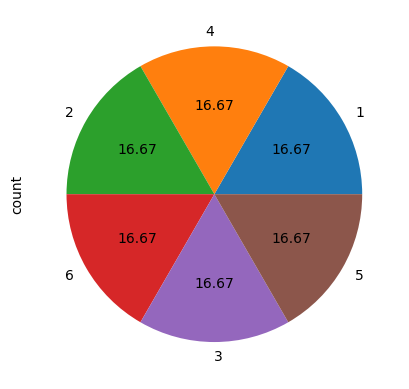

In [49]:
# various sampling strategies are used and evaluated by instantiating 
# {RandomUnderSampler(), RandomOverSampler(), and SMOTE()} sampler objects
# from the imblearn library;

rus = RandomUnderSampler(sampling_strategy = 'not minority')

ros = RandomOverSampler(sampling_strategy = 'not majority')

smote = SMOTE(sampling_strategy = 'auto', 
              random_state = 42)

# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

resample75 = pd.concat([X_train75, y_train75],
                     axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(resample75.drop(columns = ['Type']), resample75['Type'])

# a new {resample} dataset is created by concatenation {X} and {y}...

resample75 = pd.concat([X, y],
                     axis = 1)

# ...and the new distribution is displayed with a pie chart;

resample75['Type'].value_counts().plot.pie(autopct = '%.2f')

_the distribution for the target train set is now more evenly balaced._

**85 / 15**

<Axes: ylabel='count'>

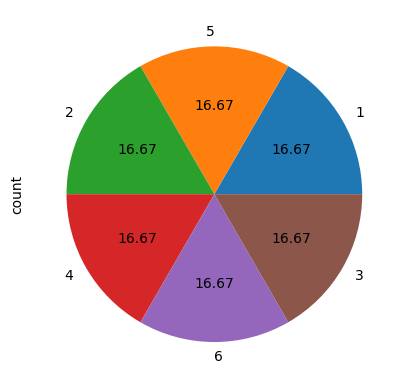

In [50]:
# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

resample85 = pd.concat([X_train85, y_train85],
                     axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(resample85.drop(columns = ['Type']), resample85['Type'])

# a new {resample} dataset is created by concatenation {X} and {y}...

resample85 = pd.concat([X, y],
                     axis = 1)

# ...and the new distribution is displayed with a pie chart;

resample85['Type'].value_counts().plot.pie(autopct = '%.2f')

_the distribution for the target train set is now more evenly balaced._

**90 / 10**

<Axes: ylabel='count'>

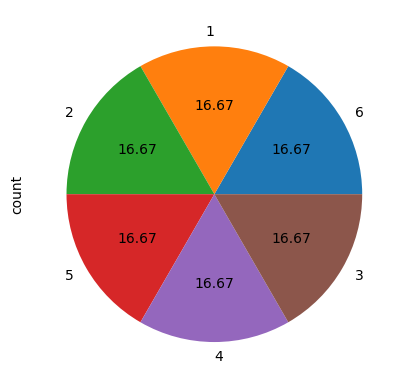

In [51]:
# a dataset for resampling purposes is created by concatenating the {X} and {y} train
# sets;

resample90 = pd.concat([X_train90, y_train90],
                     axis = 1)

# {X} and {y} are then fit to the {SMOTE()} object {smote}

X, y = smote.fit_resample(resample90.drop(columns = ['Type']), resample90['Type'])

# a new {resample} dataset is created by concatenation {X} and {y}...

resample90 = pd.concat([X, y],
                     axis = 1)

# ...and the new distribution is displayed with a pie chart;

resample90['Type'].value_counts().plot.pie(autopct = '%.2f')

_the distribution for the target train set is now more evenly balaced._

#### the **undersampling** strategy dramatically reduces the already low row count of the DataFrame when implemented,
#### the nature of how the **oversampling** strategy simply duplicates under-represented classes which have potential to introduce noise within the dataset, can result in overfitting during the training phase.
#### The **smote** resampling method mitigates these issues by the synthetic recreation of under-represented classes as opposed to creating identical copies, more accurately capturing key values and characteristics of each column

In [52]:
GENERAL_INFO(df_glass)


    structure:
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminium         214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type              214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
 
    rows / columns:
        
    (214, 10)
        
        
    important statistical values: 
        
           Refractive Index      Sodium   Magnesium   Aluminium     Silicon  \
count        214.000000  214.000000  214.000000  214.000000  214.000000  

In [53]:
GENERAL_INFO(resample75)


    structure:
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  342 non-null    float64
 1   Sodium            342 non-null    float64
 2   Magnesium         342 non-null    float64
 3   Aluminium         342 non-null    float64
 4   Silicon           342 non-null    float64
 5   Potassium         342 non-null    float64
 6   Calcium           342 non-null    float64
 7   Barium            342 non-null    float64
 8   Iron              342 non-null    float64
 9   Type              342 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 26.8 KB
 
    rows / columns:
        
    (342, 10)
        
        
    important statistical values: 
        
           Refractive Index      Sodium   Magnesium   Aluminium     Silicon  \
count        342.000000  342.000000  342.000000  342.000000  342.000000  

#### _statistical observations throughout the dataset are largely unaffected by resampling, indicating that outliers are present_

<Axes: >

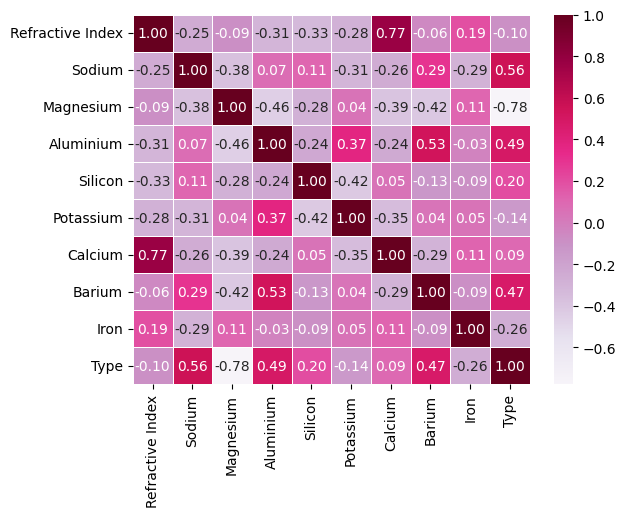

In [54]:
# a correlation matrix is instantiated to variable {correlation_matrix} using
# pandas method {df.corr()}

correlation_matrix = resample75.corr()

correlation_matrix

# which is then displayed using seaborn method {heatmap()};

sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'PuRd',
            fmt = '.2f',
            linewidths = 0.5)

#### _correlation between features is largely unaffected by resampling_

## Convert the X Train Set into a Resampled Feature Set to Match the New Target:

**75 / 25**

In [55]:
# drop the target column from the {Xtrain} DataFrame to create
# a set of features;

X_train75 = resample75.drop(columns = ['Type']) 

X_train75

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.521520,13.050000,3.650000,0.870000,72.320000,0.190000,9.850000,0.000000,0.170000
1,1.513160,13.020000,0.000000,3.040000,70.480000,6.210000,6.960000,0.000000,0.000000
2,1.524100,13.830000,2.900000,1.170000,71.150000,0.080000,10.790000,0.000000,0.000000
3,1.520650,14.360000,0.000000,2.020000,73.420000,0.000000,8.440000,1.640000,0.000000
4,1.516250,13.360000,3.580000,1.490000,72.720000,0.450000,8.210000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
337,1.516641,14.361284,0.000000,2.666619,72.874751,0.048388,9.089115,0.901940,0.000000
338,1.517125,14.282806,0.000000,2.059464,73.332864,0.000000,8.619267,1.661199,0.000000
339,1.516361,14.809091,0.000000,2.369091,73.280000,0.000000,8.811818,0.645455,0.065454
340,1.515862,14.043270,1.198757,2.074090,73.100000,0.013062,8.803882,0.720815,0.000000


**85 / 15**

In [56]:
# drop the target column from the {Xtrain} DataFrame to create
# a set of features;

X_train85 = resample85.drop(columns = ['Type']) 

X_train85

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.517780,13.210000,2.810000,1.290000,72.980000,0.510000,9.020000,0.000000,0.090000
1,1.519160,14.150000,0.000000,2.090000,72.740000,0.000000,10.880000,0.000000,0.000000
2,1.515930,13.090000,3.590000,1.520000,73.100000,0.670000,7.830000,0.000000,0.000000
3,1.521720,13.510000,3.860000,0.880000,71.790000,0.230000,9.540000,0.000000,0.110000
4,1.519370,13.790000,2.410000,1.190000,72.760000,0.000000,9.770000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
379,1.517310,14.935332,0.000000,1.814668,72.992200,0.000000,8.604133,1.552934,0.005867
380,1.521355,14.712727,2.489092,2.103636,70.530001,0.950910,8.677270,0.444547,0.000000
381,1.516090,14.294896,0.000000,2.720408,73.026332,0.026123,9.325915,0.562858,0.016327
382,1.515548,15.064089,0.000000,2.258591,73.414089,0.000000,8.498936,0.647182,0.000000


**90 / 10**

In [57]:
# drop the target column from the {Xtrain} DataFrame to create
# a set of features;

X_train90 = resample90.drop(columns = ['Type']) 

X_train90

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.516530,11.950000,0.000000,1.190000,75.180000,2.700000,8.930000,0.000000,0.000000
1,1.517780,13.210000,2.810000,1.290000,72.980000,0.510000,9.020000,0.000000,0.090000
2,1.522130,14.210000,3.820000,0.470000,71.770000,0.110000,9.570000,0.000000,0.000000
3,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
4,1.520810,13.780000,2.280000,1.430000,71.990000,0.490000,9.850000,0.000000,0.170000
...,...,...,...,...,...,...,...,...,...
403,1.516230,14.186276,0.000000,2.810586,73.265580,0.049149,9.072022,0.550962,0.069414
404,1.516180,14.175565,0.000000,2.771489,73.442970,0.047404,9.067397,0.430358,0.084076
405,1.520233,14.601905,1.411375,2.353942,71.102394,0.516243,9.552090,0.379974,0.000000
406,1.516303,14.312065,0.000000,2.716826,72.894030,0.016222,9.445365,0.571285,0.001159


## Convert the y Train Set into a Multi-Class Target: 

**75 / 25**

In [58]:
# slice the target column from the {resample} DataFrame;

y_train75 = resample75.iloc[:, 9:10]

print(X_train75.shape)
print(y_train75.shape)

(342, 9)
(342, 1)


**85 / 15**

In [59]:
# slice the target column from the {resample} DataFrame;

y_train85 = resample85.iloc[:, 9:10]

print(X_train85.shape)
print(y_train85.shape)

(384, 9)
(384, 1)


**90 / 10**

In [60]:
# slice the target column from the {resample} DataFrame;

y_train90 = resample90.iloc[:, 9:10]

print(X_train90.shape)
print(y_train90.shape)

(408, 9)
(408, 1)


**75 / 25**

In [61]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y_train75 -= 1

# convert the resulting DataFrame to a numpy array;

y_train75 = y_train75.to_numpy()

# ensure the array is 1D;

y_train75 = y_train75.flatten()

# leverage keras library to one-hot encode the target,

# considering the data will be used to train a neural network model,
# keras {to_categorical} function is the ideal one-hot encoder due to outputs
# being far simpler and easily shaped than outputs from pandas {.get_dummies()} method;

y_train75 = ONEHOT_ENCODE(y_train75)

# check the dimensions of the resulting array to ensure 
# they are 2D;

print(y_train75.shape)

(342, 6)


**85 / 15**

In [62]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y_train85 -= 1

# convert the resulting DataFrame to a numpy array;

y_train85 = y_train85.to_numpy()

# ensure the array is 1D;

y_train85 = y_train85.flatten()

# leverage keras library to one-hot encode the target,

# considering the data will be used to train a neural network model,
# keras {to_categorical} function is the ideal one-hot encoder due to outputs
# being far simpler and easily shaped than outputs from pandas {.get_dummies()} method;

y_train85 = ONEHOT_ENCODE(y_train85)

# check the dimensions of the resulting array to ensure 
# they are 2D;

print(y_train85.shape)

(384, 6)


**90 / 10**

In [63]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y_train90 -= 1

# convert the resulting DataFrame to a numpy array;

y_train90 = y_train90.to_numpy()

# ensure the array is 1D;

y_train90 = y_train90.flatten()

# leverage keras library to one-hot encode the target,

# considering the data will be used to train a neural network model,
# keras {to_categorical} function is the ideal one-hot encoder due to outputs
# being far simpler and easily shaped than outputs from pandas {.get_dummies()} method;

y_train90 = ONEHOT_ENCODE(y_train90)

# check the dimensions of the resulting array to ensure 
# they are 2D;

print(y_train90.shape)

(408, 6)


## Scale Training Sets:

**75 / 25**

In [64]:
# {StandardScaler()} object is instantiated to variable {scaler};

scaler = StandardScaler()

# {RobustScaler()} object is instantiated to variable {r_scaler};

r_scaler = RobustScaler()

# X, y train sets are fit to both the standard scaler...

sX_train75 = scaler.fit_transform(X_train75)
sX_test25 = scaler.transform(X_test25)

# and the robust scaler;

rX_train75 = r_scaler.fit_transform(X_train75)
rX_test25 = r_scaler.transform(X_test25)

# this creates two scaled datasets, one wherein outliers are penalised {r_scaler}
# and one where they are not, enabling the exploration of train sets containing
# outliers during the model training phase to determine which set gives optimal results
# and thus evaluate whether the outliers present are valid data points worth consideration;

rX_train75

array([[ 1.33519967, -0.26661021,  0.3954214 , ...,  0.75710802,
         0.        ,  2.75617759],
       [-1.71265181, -0.29119569, -0.75652766, ..., -1.27828005,
         0.        ,  0.        ],
       [ 2.27580455,  0.37261232,  0.15871954, ...,  1.41913735,
         0.        ,  0.        ],
       ...,
       [-0.54567833,  1.17499297, -0.75652766, ...,  0.02593065,
         0.64545456,  1.061201  ],
       [-0.72748247,  0.54739083, -0.37819684, ...,  0.020341  ,
         0.72081511,  0.        ],
       [ 1.78803825,  0.71683402,  0.0923464 , ...,  0.41236884,
         0.        ,  0.        ]])

**85 / 15**

In [65]:
# {StandardScaler()} object is instantiated to variable {scaler};

scaler = StandardScaler()

# {RobustScaler()} object is instantiated to variable {r_scaler};

r_scaler = RobustScaler()

# X, y train sets are fit to both the standard scaler...

sX_train85 = scaler.fit_transform(X_train85)
sX_test15 = scaler.transform(X_test15)

# and the robust scaler;

rX_train85 = r_scaler.fit_transform(X_train85)
rX_test15 = r_scaler.transform(X_test15)

# this creates two scaled datasets, one wherein outliers are penalised {r_scaler}
# and one where they are not, enabling the exploration of train sets containing
# outliers during the model training phase to determine which set gives optimal results
# and thus evaluate whether the outliers present are valid data points worth consideration;

rX_train85

array([[ 5.34953483e-04, -1.55610561e-01,  1.20807890e-01, ...,
         1.56990672e-01,  0.00000000e+00,  1.71071438e+00],
       [ 4.83650207e-01,  5.75759077e-01, -7.24972928e-01, ...,
         1.49271778e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.47119553e-01, -2.48976898e-01,  3.55579790e-01, ...,
        -6.97587425e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.91181014e-01,  6.88495523e-01, -7.24972928e-01, ...,
         3.76677931e-01,  5.62857854e-01,  3.10343326e-01],
       [-7.80775815e-01,  1.28696843e+00, -7.24972928e-01, ...,
        -2.17202700e-01,  6.47182241e-01,  0.00000000e+00],
       [ 8.77637936e-01,  1.43031966e+00, -4.61043169e-01, ...,
        -1.67366054e-01,  1.63312492e+00,  7.91998805e-01]])

**90 / 10**

In [66]:
# {StandardScaler()} object is instantiated to variable {scaler};

scaler = StandardScaler()

# {RobustScaler()} object is instantiated to variable {r_scaler};

r_scaler = RobustScaler()

# X, y train sets are fit to both the standard scaler...

sX_train90 = scaler.fit_transform(X_train90)
sX_test10 = scaler.transform(X_test10)

# and the robust scaler;

rX_train90 = r_scaler.fit_transform(X_train90)
rX_test10 = r_scaler.transform(X_test10)

# this creates two scaled datasets, one wherein outliers are penalised {r_scaler}
# and one where they are not, enabling the exploration of train sets containing
# outliers during the model training phase to determine which set gives optimal results
# and thus evaluate whether the outliers present are valid data points worth consideration;

rX_train90

array([[-0.40600498, -1.17394544, -0.69669104, ...,  0.09669243,
         0.        ,  0.        ],
       [ 0.03339435, -0.16090863,  0.12991716, ...,  0.16359787,
         0.        ,  1.20407325],
       [ 1.56250402,  0.64308884,  0.42702544, ...,  0.57246446,
         0.        ,  0.        ],
       ...,
       [ 0.89573271,  0.9581792 , -0.28151151, ...,  0.55915019,
         0.37997367,  0.        ],
       [-0.48591591,  0.72514922, -0.69669104, ...,  0.47981175,
         0.57128465,  0.01550165],
       [-0.50415529,  0.77282908, -0.69669104, ...,  0.44560302,
         0.55368966,  0.        ]])

### _ensure training and testing sets have the correct dimensions..._

**75 / 25**

In [67]:
dimensions = f'''UnScaled ...

[X train]
{X_train75.shape}

[y train]
{y_train75.shape}

[X test]
{X_test25.shape}

[y test]
{y_test25.shape}


StandardScaled ...

[X train]
{sX_train75.shape}

[X test]
{sX_test25.shape}


RobustScaled ...

[X train]
{rX_train75.shape}

[X test]
{rX_test25.shape}
'''

print(dimensions)

UnScaled ...

[X train]
(342, 9)

[y train]
(342, 6)

[X test]
(54, 9)

[y test]
(54, 6)


StandardScaled ...

[X train]
(342, 9)

[X test]
(54, 9)


RobustScaled ...

[X train]
(342, 9)

[X test]
(54, 9)



**85 / 15**

In [68]:
dimensions = f'''UnScaled ...

[X train]
{X_train85.shape}

[y train]
{y_train85.shape}

[X test]
{X_test15.shape}

[y test]
{y_test15.shape}


StandardScaled ...

[X train]
{sX_train85.shape}

[X test]
{sX_test15.shape}


RobustScaled ...

[X train]
{rX_train85.shape}

[X test]
{rX_test15.shape}
'''

print(dimensions)

UnScaled ...

[X train]
(384, 9)

[y train]
(384, 6)

[X test]
(33, 9)

[y test]
(33, 6)


StandardScaled ...

[X train]
(384, 9)

[X test]
(33, 9)


RobustScaled ...

[X train]
(384, 9)

[X test]
(33, 9)



**90 / 10**

In [69]:
dimensions = f'''UnScaled ...

[X train]
{X_train90.shape}

[y train]
{y_train90.shape}

[X test]
{X_test10.shape}

[y test]
{y_test10.shape}


StandardScaled ...

[X train]
{sX_train90.shape}

[X test]
{sX_test10.shape}


RobustScaled ...

[X train]
{rX_train90.shape}

[X test]
{rX_test10.shape}
'''

print(dimensions)

UnScaled ...

[X train]
(408, 9)

[y train]
(408, 6)

[X test]
(22, 9)

[y test]
(22, 6)


StandardScaled ...

[X train]
(408, 9)

[X test]
(22, 9)


RobustScaled ...

[X train]
(408, 9)

[X test]
(22, 9)



**75 / 25**

In [70]:
X_train75

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.521520,13.050000,3.650000,0.870000,72.320000,0.190000,9.850000,0.000000,0.170000
1,1.513160,13.020000,0.000000,3.040000,70.480000,6.210000,6.960000,0.000000,0.000000
2,1.524100,13.830000,2.900000,1.170000,71.150000,0.080000,10.790000,0.000000,0.000000
3,1.520650,14.360000,0.000000,2.020000,73.420000,0.000000,8.440000,1.640000,0.000000
4,1.516250,13.360000,3.580000,1.490000,72.720000,0.450000,8.210000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
337,1.516641,14.361284,0.000000,2.666619,72.874751,0.048388,9.089115,0.901940,0.000000
338,1.517125,14.282806,0.000000,2.059464,73.332864,0.000000,8.619267,1.661199,0.000000
339,1.516361,14.809091,0.000000,2.369091,73.280000,0.000000,8.811818,0.645455,0.065454
340,1.515862,14.043270,1.198757,2.074090,73.100000,0.013062,8.803882,0.720815,0.000000


**85 / 15**

In [71]:
X_train85

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.517780,13.210000,2.810000,1.290000,72.980000,0.510000,9.020000,0.000000,0.090000
1,1.519160,14.150000,0.000000,2.090000,72.740000,0.000000,10.880000,0.000000,0.000000
2,1.515930,13.090000,3.590000,1.520000,73.100000,0.670000,7.830000,0.000000,0.000000
3,1.521720,13.510000,3.860000,0.880000,71.790000,0.230000,9.540000,0.000000,0.110000
4,1.519370,13.790000,2.410000,1.190000,72.760000,0.000000,9.770000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
379,1.517310,14.935332,0.000000,1.814668,72.992200,0.000000,8.604133,1.552934,0.005867
380,1.521355,14.712727,2.489092,2.103636,70.530001,0.950910,8.677270,0.444547,0.000000
381,1.516090,14.294896,0.000000,2.720408,73.026332,0.026123,9.325915,0.562858,0.016327
382,1.515548,15.064089,0.000000,2.258591,73.414089,0.000000,8.498936,0.647182,0.000000


**90 / 10**

In [72]:
X_train90

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.516530,11.950000,0.000000,1.190000,75.180000,2.700000,8.930000,0.000000,0.000000
1,1.517780,13.210000,2.810000,1.290000,72.980000,0.510000,9.020000,0.000000,0.090000
2,1.522130,14.210000,3.820000,0.470000,71.770000,0.110000,9.570000,0.000000,0.000000
3,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
4,1.520810,13.780000,2.280000,1.430000,71.990000,0.490000,9.850000,0.000000,0.170000
...,...,...,...,...,...,...,...,...,...
403,1.516230,14.186276,0.000000,2.810586,73.265580,0.049149,9.072022,0.550962,0.069414
404,1.516180,14.175565,0.000000,2.771489,73.442970,0.047404,9.067397,0.430358,0.084076
405,1.520233,14.601905,1.411375,2.353942,71.102394,0.516243,9.552090,0.379974,0.000000
406,1.516303,14.312065,0.000000,2.716826,72.894030,0.016222,9.445365,0.571285,0.001159


## Model Initialisation:

**75 / 25**

In [73]:
# convert X_train75 to a numpy array;

X_train75 = X_train75.to_numpy()

**85 / 15**

In [74]:
# convert X_train75 to a numpy array;

X_train85 = X_train85.to_numpy()

**90 / 10**

In [75]:
# convert X_train75 to a numpy array;

X_train90 = X_train90.to_numpy()

**75 / 25**

In [76]:
X_train75.shape

(342, 9)

In [77]:
y_train75.shape

(342, 6)

**85 / 15**

In [78]:
X_train85.shape

(384, 9)

In [79]:
y_train85.shape

(384, 6)

**90 / 10**

In [80]:
X_train90.shape

(408, 9)

In [81]:
y_train90.shape

(408, 6)

**75 / 25**

In [82]:
# create rX_train dupes;

rX_train75_1 = rX_train75
rX_train75_2 = rX_train75_1

# create rX_test dupes;

rX_test25_1 = rX_test25
rX_test25_2 = rX_test25_1

# create sX_train dupes;

sX_train75_1 = sX_train75
sX_train75_2 = sX_train75_1

# create sX_test dupes;

sX_test25_1 = sX_test25
sX_test25_2 = sX_test25_1

# create y_train dupes;

y_train75_1 = y_train75
y_train75_2 = y_train75_1

# create y_test dupes;

y_test25_1 = y_test25
y_test25_2 = y_test25_1

**85 / 15**

In [83]:
# create rX_train dupes;

rX_train75_1 = rX_train75
rX_train75_2 = rX_train75_1

# create rX_test dupes;

rX_test25_1 = rX_test25
rX_test25_2 = rX_test25_1

# create sX_train dupes;

sX_train75_1 = sX_train75
sX_train75_2 = sX_train75_1

# create sX_test dupes;

sX_test25_1 = sX_test25
sX_test25_2 = sX_test25_1

# create y_train dupes;

y_train75_1 = y_train75
y_train75_2 = y_train75_1

# create y_test dupes;

y_test25_1 = y_test25
y_test25_2 = y_test25_1

**90 / 10**

In [84]:
# create rX_train dupes;

rX_train75_1 = rX_train75
rX_train75_2 = rX_train75_1

# create rX_test dupes;

rX_test25_1 = rX_test25
rX_test25_2 = rX_test25_1

# create sX_train dupes;

sX_train75_1 = sX_train75
sX_train75_2 = sX_train75_1

# create sX_test dupes;

sX_test25_1 = sX_test25
sX_test25_2 = sX_test25_1

# create y_train dupes;

y_train75_1 = y_train75
y_train75_2 = y_train75_1

# create y_test dupes;

y_test25_1 = y_test25
y_test25_2 = y_test25_1

## Define Neural Network Function:
#### _a function is written to allow the flexible creation of different types of neural network configurations to facilitate quick experimentation to roughly determine the ideal hyperparameters, which will then in turn be optimised utilising RandomSearchCV from the sklearn library..._

In [124]:
def NEURAL_NETWORK(target_col,
                   input_set,
                   optimise,
                   model = Sequential(),
                   neurons = 64,
                   dropout = False,
                   dropout_rate = 0.3,
                   activation1 = 'relu',
                   activation2 = 'softmax',
                   regularise = False,
                   regulariser = l2,
                   r_rate = 0.01,
                   loss_function = 'categorical_crossentropy',
                   evaluate = 'accuracy'):


    """.
    
    CONFIGURES A NEURAL NETWORK FOR USE IN MACHINE LEARNING TASKS,
    PARAMETER INPUTS ARE AS FOLLOWS...


    target_col : un-encoded pandas DataFrame column corresponding to the expected output y-array, 
                 for instance, if pandas DataFrame column df[target] was used to create numpy
                 array y_train75, input df[target]
                 
    input_set : feature (X) training set as a numpy array
    
    model : the type of nn from the Keras library, defaults to Sequential()
    
    neurons : the amount of neurons utilised by the network as an integer, defaults to 64
    
    dropout : whether to include dropout layers as a Boolean, defaults to False

    dropout_rate : float value, defaults to 0.3
    
    activation1 / activation2 : hidden layer and output activation functions, 
                                default to 'relu' and 'softmax' respectively
    
    regularise : whether to use a kernel regulariser as a Boolean, defaults to False

    r_rate : fraction of input units to drop during regularisation as a float value 
             between 0 and 1, defaults to 0.01

    optimise : keras optimizer, defaults to Adam()

    loss_function : loss function as a string, defaults to 'categorical_crossentropy'

    evaluate : evaluation metric as a string, defaults to 'accuracy'
    """


    if np.any(np.isnan(input_set)) or np.any(np.isinf(input_set)) or np.any(np.isnan(target_col)) or np.any(np.isinf(target_col)):
        
        raise ValueError('Input data contains invalid values (NaN or Infinite), review preprocessing steps')
        
    # neural network model is instantiated to the variable {nn};
    
    nn = model

    # a boolean is assigned to both the {dropout} and {regularise} variables;

    dropout = dropout
    regularise = regularise

    # if both dropout and regularise == True;

    if dropout and regularise:

        # keras method {.add()} adds the first layer within the neural network,
        
        # parameter {Dense()} defines the type of layer (fully connected) and
        # {Dense()} parameters are used to define the amount of neurons {neurons};
            
        nn.add(Dense(neurons, 

                     # the dimensions of the input training set using parameter {input_dim};
                     
                     input_dim = input_set.shape[1],

                     # the activation function with parameter {activation} and the regulariser;
                     
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}',
                     
                     # function with parameter {kernel_regulariser};
                     
                     kernel_regularizer = regulariser(r_rate)))

        # dropout == True, so two dropout layers are added with
        # keras method {.add()} with a dropout rate set
        # to 0.3;
        
        nn.add(Dropout(dropout_rate,
                       name = f'{np.random.randint(0, 9999999)}'))
        
        # second hidden layer is then added, 
        # the number of neurons is determine by floor
        # dividing the input {neurons} value by 2;
        
        nn.add(Dense((neurons // 2), 

                     # the second hidden layer utilises the 
                     # same activation function as the first;
                     
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}'))

        # another dropout layer is added;

        nn.add(Dropout(dropout_rate, 
                       name = f'{np.random.randint(0, 9999999)}'))
        
        # the output layer is then added, the number of neurons this time
        # being determined by the amount of unique (predictable) values present within 
        # the target;
        
        nn.add(Dense(len(np.unique(target_col)), 

                     # the output activation function can differ from the hidden
                     # layer activation function, and so {activation2} is instantiated
                     # to the activation parameter at this point;
                     
                     activation = activation2,
                     name = f'{np.random.randint(0, 9999999)}'))
        
    # if only dropout == True;

    elif dropout and regularise == False:

        # keras method {.add()} adds the first layer within the neural network,
        # omitting the {kernel_regularizer} parameter...
        
        # parameter {Dense()} defines the type of layer (fully connected) and
        # {Dense()} parameters are used to define the amount of neurons {neurons}
        
        nn.add(Dense(neurons, 

                     # the dimensions of the input training set using parameter {input_dim};
                     
                     input_dim = input_set.shape[1],

                     # the activation function with parameter {activation} and the regulariser;
                     
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}'))

        # dropout == True, so two dropout layers are added with
        # keras method {.add()} with a dropout rate set
        # to 0.3;
        
        nn.add(Dropout(dropout_rate,
                       name = f'{np.random.randint(0, 9999999)}'))
        
        # second hidden layer is then added, 
        # the number of neurons is determine by floor
        # dividing the input {neurons} value by 2;
        
        nn.add(Dense((neurons // 2), 

                     # the second hidden layer utilises the 
                     # same activation function as the first;
                     
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}'))

        # another dropout layer is added;
        
        nn.add(Dropout(dropout_rate, 
                       name = f'{np.random.randint(0, 9999999)}'))
        
        # the output layer is then added, the number of neurons this time
        # being determined by the amount of unique (predictable) values present within 
        # the target;
        
        nn.add(Dense(len(np.unique(target_col)), 

                     # the output activation function can differ from the hidden
                     # layer activation function, and so {activation2} is instantiated
                     # to the activation parameter at this point;
                     
                     activation = activation2,
                     name = f'{np.random.randint(0, 9999999)}'))

    # if only regularise == True;

    elif dropout == False and regularise:  

        # keras method {.add()} adds the first layer within the neural network,
        # as {dropout == False}, no dropout layers are present...
        
        # parameter {Dense()} defines the type of layer (fully connected) and
        # {Dense()} parameters are used to define the amount of neurons {neurons};
        
        nn.add(Dense(neurons, 
                     input_dim = input_set.shape[1],
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}',
                     kernel_regularizer = regulariser(r_rate)))
        
        # add another hidden layer
        
        nn.add(Dense((neurons // 2), 
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}'))
        
        # add the output layer
        
        nn.add(Dense(len(np.unique(target_col)), 
                     activation = activation2,
                     name = f'{np.random.randint(0, 9999999)}'))

    # if both {regularise} and {dropout} == False; 
    
    else:

        # keras method {.add()} adds the first layer within the neural network,
        # as {dropout == False} and {regularise == False}, no dropout layers are present
        # and no kernel regularizer is present...
        
        # parameter {Dense()} defines the type of layer (fully connected) and
        # {Dense()} parameters are used to define the amount of neurons {neurons};
        
        nn.add(Dense(neurons, 
                     input_dim = input_set.shape[1],
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}'))
        
        # add another hidden layer
        
        nn.add(Dense((neurons // 2), 
                     activation = activation1,
                     name = f'{np.random.randint(0, 9999999)}'))
        
        # add the output layer
        
        nn.add(Dense(len(np.unique(target_col)), 
                     activation = activation2,
                     name = f'{np.random.randint(0, 9999999)}'))
        
    # the configured model is compiled...
    
    # optimizer is instantiated to parameter {optimizer};
        
    nn.compile(optimizer = optimise,

               # loss function is instantiated to parameter {loss_function};
               loss = loss_function,

               # evaluation metric is instantiated to parameter {metrics};
               
               metrics = [evaluate])

    # and returned;
    
    return nn
               

In [86]:
help(NEURAL_NETWORK)

Help on function NEURAL_NETWORK in module __main__:

NEURAL_NETWORK(target_col, input_set, optimise, model=<Sequential name=sequential, built=False>, neurons=64, dropout=False, dropout_rate=0.3, activation1='relu', activation2='softmax', regularise=False, regulariser=<class 'keras.src.regularizers.regularizers.L2'>, r_rate=0.01, loss_function='categorical_crossentropy', evaluate='accuracy')
    .

    CONFIGURES A NEURAL NETWORK FOR USE IN MACHINE LEARNING TASKS,
    PARAMETER INPUTS ARE AS FOLLOWS...


    target_col : un-encoded pandas DataFrame column corresponding to the expected output y-array,
                 for instance, if pandas DataFrame column df[target] was used to create numpy
                 array y_train75, input df[target]

    input_set : feature (X) training set as a numpy array

    model : the type of nn from the Keras library, defaults to Sequential()

    neurons : the amount of neurons utilised by the network as an integer, defaults to 64

    dropout : whethe

# **Parameter Exploration / Experimentation...**
#### _phase 1_

## Neural Network Function is Used to Instantiate a Neural Network Object to the Variable {nn}...

In [88]:
# parameter {target_col} is set to {resample['Type']} to dynamically
# assign neurons to the output layer;

optimizer = Adam(learning_rate = 0.001, 
                 clipvalue = 1.0)

nn = NEURAL_NETWORK(target_col = resample75['Type'],

                    optimise = optimizer,
                    
                    activation1 = 'relu',

                    # the feature train set {X_train75} is 
                    # instantiated to parameter {input_set};
                    
                    input_set = rX_train75,

                    # regularise is set to {True} to exclude
                    # a {kernel_regulariser} from the network;
                    
                    regularise = False,

                    # dropout is set to {True} to exclude dropout
                    # layers from the network;
                    
                    dropout = False,

                    # as the neural network will be returning a 
                    # multi-class classification, the output layer
                    # activation function is set to {'softmax'};
                    
                    activation2 = 'softmax',
                    
                    # a {'categorical_crossentropy'} loss function will be used 
                    # as the problem is of a 'multi-class' nature;
                    
                    loss_function = 'categorical_crossentropy',

                    # the model will be evaluated on its ability to predict
                    # an outcome successfully, it is suitable as each 
                    # class is of equal importance;
                    
                    evaluate = 'accuracy')

# set default weights;

initial_weights = nn.get_weights()

In [89]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2191349 (Dense)                │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1833511 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3992187 (Dense)                 │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,918 (11.40 KB)

 Trainable params: 2,918 (11.40 KB)

 Non-trainable params: 0 (0.00 B)

**75 / 25**

In [90]:
# Train the model on the resampled data

history_1_75 = nn.fit(rX_train75, 
                      y_train75, 
                      epochs = 20, 
                      batch_size = 32,
                      validation_data = (rX_test25, 
                                         y_test25))


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1262 - loss: 1.8799 - val_accuracy: 0.2407 - val_loss: 1.7445
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4285 - loss: 1.6885 - val_accuracy: 0.3889 - val_loss: 1.6672
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5871 - loss: 1.5473 - val_accuracy: 0.3519 - val_loss: 1.6126
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6212 - loss: 1.4221 - val_accuracy: 0.3148 - val_loss: 1.5536
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6510 - loss: 1.3135 - val_accuracy: 0.3519 - val_loss: 1.4750
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6657 - loss: 1.2140 - val_accuracy: 0.4259 - val_loss: 1.3967
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6886 - loss: 1.0920 - val_accuracy: 0.4444 - val_loss: 1.3109
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7078 - loss: 0.9685 - val_accuracy: 0.4630 - v

## Model Evaluation:

In [91]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(rX_test25), 
                   axis = 1)  

y_test = np.argmax(y_test25, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.70      0.37      0.48        19
           2       0.21      0.75      0.33         4
           3       0.75      1.00      0.86         3
           4       0.50      0.50      0.50         2
           5       0.88      0.88      0.88         8

    accuracy                           0.61        54
   macro avg       0.63      0.69      0.63        54
weighted avg       0.70      0.61      0.63        54



the Neural Network appears to be overfitting to classes 5, 4 and 3, evaluation metrics show that the model is predicting and generalising classes 1 moderately well, whereas class 2 scores low on all metrics and class 0, while featuring a high precision, has a fairly average recall and f1 score. Hyperparameter optimisation will be needed to explore alternative configurations and to determine an optimal neural network model for the classification task at hand...

## Create a Confusion Matrix:

In [92]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,0,0
1,2,2
2,5,5
3,1,2
4,5,5
5,1,2
6,5,5
7,0,0
8,1,2
9,0,0


In [93]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



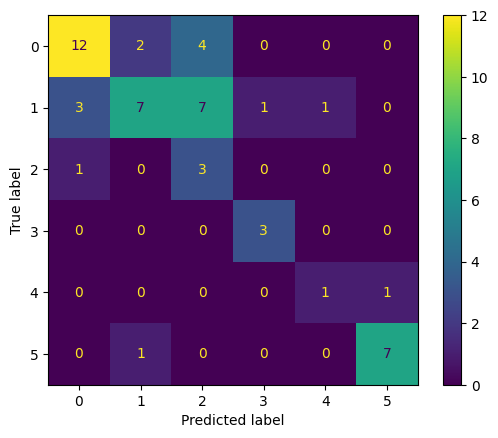

In [94]:
CONFUSION(df_results)

### _as observed in both the above DataFrame and confusion matrix, the neural network is overfitting severely to classes 0, 4, and 5_
### _hyperparameter optimisation methodologies will need to be implemented to mitigate overfitting and ensure optimised model performance_

**85 / 15**

In [95]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_1_85 = nn.fit(X_train85, 
                      y_train85, 
                      epochs = 20, 
                      batch_size = 32,
                      validation_data = (X_test15, 
                                         y_test15))


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.1226 - loss: 9.1305 - val_accuracy: 0.0303 - val_loss: 2.8050
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0938 - loss: 2.6388 - val_accuracy: 0.0909 - val_loss: 1.8223
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.1865 - loss: 1.8868 - val_accuracy: 0.1212 - val_loss: 1.8642
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2029 - loss: 1.8496 - val_accuracy: 0.0909 - val_loss: 1.8581
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.1563 - loss: 1.8506 - val_accuracy: 0.2727 - val_loss: 1.6962
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.2839 - loss: 1.7782 - val_accuracy: 0.0606 - val_loss: 1.9943
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2396 - loss: 1.8026 - val_accuracy: 0.2424 - val_loss: 1.6672
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2843 - loss: 1.7160 - val_accuracy: 0.1515 - v

In [96]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(X_test15), 
                   axis = 1)  

y_test = np.argmax(y_test15, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.46      0.50      0.48        12
           2       0.00      0.00      0.00         3
           3       0.40      1.00      0.57         2
           4       0.17      1.00      0.29         1
           5       1.00      1.00      1.00         4

    accuracy                           0.42        33
   macro avg       0.39      0.60      0.41        33
weighted avg       0.43      0.42      0.39        33



In [97]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,1,2
1,1,1
2,3,3
3,1,3
4,0,4
5,0,4
6,4,4
7,1,1
8,3,3
9,1,1


In [98]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



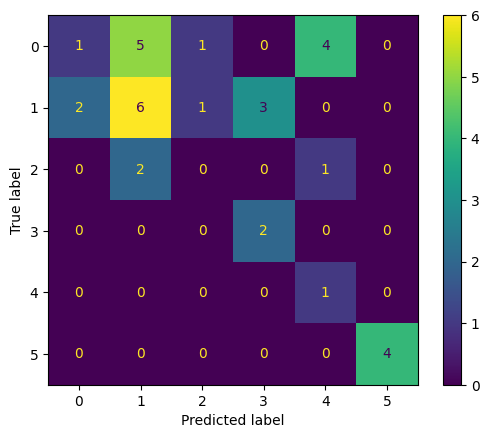

In [99]:
CONFUSION(df_results)

**90 / 10**

In [100]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_1_90 = nn.fit(sX_train90, 
                      y_train90, 
                      epochs = 20, 
                      batch_size = 32,
                      validation_data = (sX_test10, 
                                         y_test10))


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.1656 - loss: 1.8622 - val_accuracy: 0.3636 - val_loss: 1.7230
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4897 - loss: 1.5837 - val_accuracy: 0.3636 - val_loss: 1.5858
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6134 - loss: 1.3926 - val_accuracy: 0.3636 - val_loss: 1.4754
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6385 - loss: 1.2547 - val_accuracy: 0.3636 - val_loss: 1.3801
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6630 - loss: 1.0414 - val_accuracy: 0.3636 - val_loss: 1.2964
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6521 - loss: 0.9241 - val_accuracy: 0.3636 - val_loss: 1.2187
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6689 - loss: 0.8171 - val_accuracy: 0.3636 - val_loss: 1.1566
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6835 - loss: 0.7426 - val_accuracy: 0.5000 - v

In [101]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(sX_test10), 
                   axis = 1)  

y_test = np.argmax(y_test10, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.62      0.62      0.62         8
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      0.67      0.80         3

    accuracy                           0.64        22
   macro avg       0.69      0.73      0.68        22
weighted avg       0.67      0.64      0.64        22



In [102]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,4,4
1,0,2
2,1,4
3,1,1
4,1,1
5,0,1
6,3,3
7,1,1
8,1,1
9,5,1


In [103]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



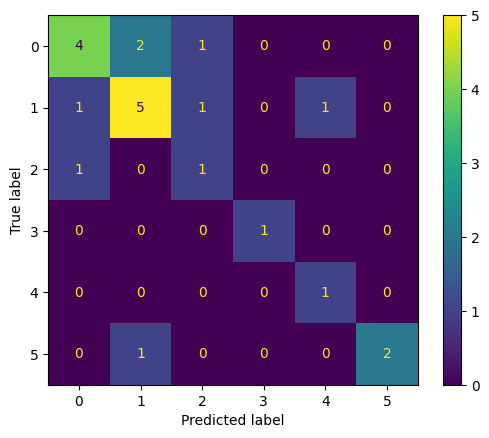

In [104]:
CONFUSION(df_results)

# **Parameter Exploration / Experimentation...**
#### _phase 2_

In [105]:
# clear session;

K.clear_session(free_memory = True)

# parameter {target_col} is set to {resample['Type']} to dynamically
# assign neurons to the output layer;

optimizer = Adam(learning_rate = 0.001, 
                 clipvalue = 1.0)

nn = NEURAL_NETWORK(target_col = resample75['Type'],

                    optimise = optimizer,
                    
                    activation1 = 'relu',

                    # the feature train set {X_train75} is 
                    # instantiated to parameter {input_set};
                    
                    input_set = rX_train75,

                    # regularise is set to {True} to exclude
                    # a {kernel_regulariser} from the network;
                    
                    regularise = True,

                    # dropout is set to {True} to exclude dropout
                    # layers from the network;
                    
                    dropout = True,

                    # as the neural network will be returning a 
                    # multi-class classification, the output layer
                    # activation function is set to {'softmax'};
                    
                    activation2 = 'softmax',
                    
                    # a {'categorical_crossentropy'} loss function will be used 
                    # as the problem is of a 'multi-class' nature;
                    
                    loss_function = 'categorical_crossentropy',

                    # the model will be evaluated on its ability to predict
                    # an outcome successfully, it is suitable as each 
                    # class is of equal importance;
                    
                    evaluate = 'accuracy')

# set default weights;

initial_weights = nn.get_weights()

In [106]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2191349 (Dense)                │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1833511 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3992187 (Dense)                 │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8036431 (Dense)                │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_607498 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense5262899 (Dense)                 │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,644 (22.05 KB)

 Trainable params: 5,644 (22.05 KB)

 Non-trainable params: 0 (0.00 B)

**75 / 25**

In [107]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_2_75 = nn.fit(sX_train75, 
                      y_train75, 
                      epochs = 35, 
                      batch_size = 32,
                      validation_data = (sX_test25, 
                                         y_test25))


Epoch 1/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.2347 - loss: 1.8921 - val_accuracy: 0.4444 - val_loss: 1.8321
Epoch 2/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3373 - loss: 1.8204 - val_accuracy: 0.5185 - val_loss: 1.7611
Epoch 3/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.4938 - loss: 1.7364 - val_accuracy: 0.5370 - val_loss: 1.6876
Epoch 4/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.5895 - loss: 1.6452 - val_accuracy: 0.5370 - val_loss: 1.6116
Epoch 5/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6646 - loss: 1.5500 - val_accuracy: 0.5370 - val_loss: 1.5129
Epoch 6/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6924 - loss: 1.4374 - val_accuracy: 0.5370 - val_loss: 1.4223
Epoch 7/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6978 - loss: 1.3632 - val_accuracy: 0.5185 - val_loss: 1.3372
Epoch 8/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6995 - loss: 1.2126 - val_accuracy: 0.

In [108]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(sX_test25), 
                   axis = 1)  

y_test = np.argmax(y_test25, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

           0       0.55      0.33      0.41        18
           1       0.70      0.74      0.72        19
           2       0.33      0.75      0.46         4
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       0.88      0.88      0.88         8

    accuracy                           0.65        54
   macro avg       0.69      0.78      0.71        54
weighted avg       0.66      0.65      0.64        54



In [109]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,0,2
1,2,0
2,5,5
3,1,1
4,5,5
5,1,1
6,5,5
7,0,1
8,1,0
9,0,0


In [110]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



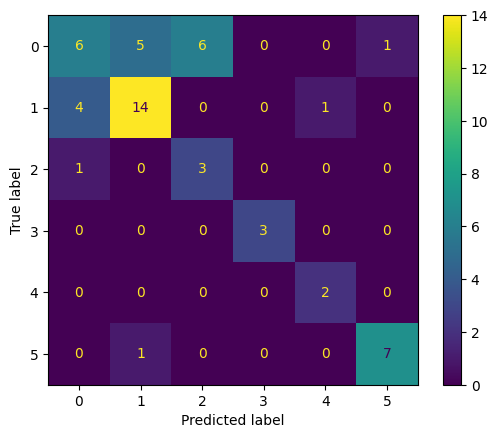

In [111]:
CONFUSION(df_results)

**85 / 15**

In [112]:
# Train the model on the resampled data

history_2_85 = nn.fit(rX_train85, 
                      y_train85, 
                      epochs = 35, 
                      batch_size = 32,
                      validation_data = (rX_test15, 
                                         y_test15))


Epoch 1/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7379 - loss: 0.7940 - val_accuracy: 0.6061 - val_loss: 1.2232
Epoch 2/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8053 - loss: 0.6130 - val_accuracy: 0.6364 - val_loss: 1.0601
Epoch 3/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.8245 - loss: 0.5181 - val_accuracy: 0.6061 - val_loss: 1.1472
Epoch 4/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.8227 - loss: 0.5250 - val_accuracy: 0.6364 - val_loss: 1.0032
Epoch 5/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8646 - loss: 0.4549 - val_accuracy: 0.6970 - val_loss: 1.0684
Epoch 6/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8332 - loss: 0.5192 - val_accuracy: 0.6364 - val_loss: 1.0244
Epoch 7/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8611 - loss: 0.4721 - val_accuracy: 0.6970 - val_loss: 1.0400
Epoch 8/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.8942 - loss: 0.3902 - val_accuracy: 0.

In [113]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(rX_test15), 
                   axis = 1)  

y_test = np.argmax(y_test15, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.67      0.67      0.67        12
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       1.00      0.75      0.86         4

    accuracy                           0.70        33
   macro avg       0.74      0.79      0.75        33
weighted avg       0.71      0.70      0.70        33



In [114]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,1,1
1,1,0
2,3,3
3,1,1
4,0,0
5,0,0
6,4,4
7,1,1
8,3,3
9,1,0


In [115]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



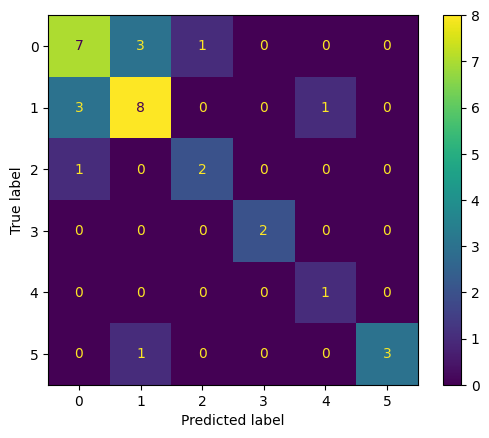

In [116]:
CONFUSION(df_results)

**90 / 10**

In [117]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_2_90 = nn.fit(X_train90, 
                      y_train90, 
                      epochs = 35, 
                      batch_size = 32,
                      validation_data = (X_test10, 
                                         y_test10))


Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.1715 - loss: 1.9044 - val_accuracy: 0.0909 - val_loss: 1.8789
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.1771 - loss: 1.8933 - val_accuracy: 0.3636 - val_loss: 1.8659
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.1537 - loss: 1.8816 - val_accuracy: 0.3636 - val_loss: 1.8627
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.2124 - loss: 1.8738 - val_accuracy: 0.3636 - val_loss: 1.8542
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.1512 - loss: 1.8728 - val_accuracy: 0.3636 - val_loss: 1.8562
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.1574 - loss: 1.8635 - val_accuracy: 0.3636 - val_loss: 1.8429
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.1290 - loss: 1.8570 - val_accuracy: 0.3636 - val_loss: 1.8427
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.1720 - loss: 1.8490 - val_accuracy: 0.

In [118]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(X_test10), 
                   axis = 1)  

y_test = np.argmax(y_test10, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.36      1.00      0.53         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3

    accuracy                           0.36        22
   macro avg       0.06      0.17      0.09        22
weighted avg       0.13      0.36      0.19        22



In [119]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,4,1
1,0,1
2,1,1
3,1,1
4,1,1
5,0,1
6,3,1
7,1,1
8,1,1
9,5,1


In [120]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



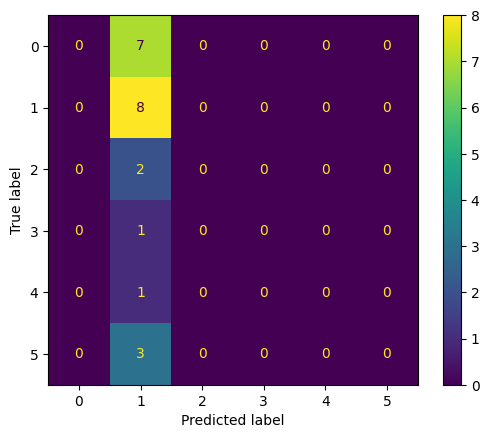

In [121]:
CONFUSION(df_results)

# **Parameter Exploration / Experimentation...**
#### _phase 3_

In [125]:
# clear session;

K.clear_session(free_memory = True)

# parameter {target_col} is set to {resample['Type']} to dynamically
# assign neurons to the output layer;

optimizer = Adam(learning_rate = 0.001, 
                 clipvalue = 1.0)

nn = NEURAL_NETWORK(target_col = resample75['Type'],

                    
                    # neurons are decreased and dropout rate is decreased
                    # in an attempt to further mitigate overfitting;
                    
                    neurons = 32,
                    dropout_rate = 0.5,
                    activation1 = 'relu',
                    optimise = optimizer,

                    # the feature train set {X_train75} is 
                    # instantiated to parameter {input_set};
                    
                    input_set = rX_train75,

                    # regularise is set to {True} to exclude
                    # a {kernel_regulariser} from the network;
                    
                    regularise = True,

                    # dropout is set to {True} to exclude dropout
                    # layers from the network;
                    
                    dropout = True,

                    # as the neural network will be returning a 
                    # multi-class classification, the output layer
                    # activation function is set to {'softmax'};
                    
                    activation2 = 'softmax',
                    
                    # a {'categorical_crossentropy'} loss function will be used 
                    # as the problem is of a 'multi-class' nature;
                    
                    loss_function = 'categorical_crossentropy',

                    # the model will be evaluated on its ability to predict
                    # an outcome successfully, it is suitable as each 
                    # class is of equal importance;
                    
                    evaluate = 'accuracy')

# set default weights;

initial_weights = nn.get_weights()

In [127]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 4576858 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 8693102 (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024342 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 8547785 (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 9078017 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950 (3.71 KB)

 Trainable params: 950 (3.71 KB)

 Non-trainable params: 0 (0.00 B)

**75 / 25**

In [128]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_3_75 = nn.fit(X_train75, 
                      y_train75, 
                      epochs = 35, 
                      batch_size = 32,
                      validation_data = (X_test25, 
                                         y_test25))


Epoch 1/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.1503 - loss: 17.8077 - val_accuracy: 0.3333 - val_loss: 5.8929
Epoch 2/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.1662 - loss: 13.7139 - val_accuracy: 0.3333 - val_loss: 3.8765
Epoch 3/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.1672 - loss: 10.5246 - val_accuracy: 0.3333 - val_loss: 2.6595
Epoch 4/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.1234 - loss: 9.2376 - val_accuracy: 0.1481 - val_loss: 1.9914
Epoch 5/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.1844 - loss: 6.0348 - val_accuracy: 0.0556 - val_loss: 1.9568
Epoch 6/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.1835 - loss: 5.2903 - val_accuracy: 0.3333 - val_loss: 1.9463
Epoch 7/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.2007 - loss: 4.3754 - val_accuracy: 0.3519 - val_loss: 1.8833
Epoch 8/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.2094 - loss: 3.8004 - val_accuracy: 0.3148

In [129]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(X_test25), 
                   axis = 1)  

y_test = np.argmax(y_test25, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.35      1.00      0.52        19
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8

    accuracy                           0.35        54
   macro avg       0.06      0.17      0.09        54
weighted avg       0.12      0.35      0.18        54



In [130]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,0,1
1,2,1
2,5,1
3,1,1
4,5,1
5,1,1
6,5,1
7,0,1
8,1,1
9,0,1


In [131]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



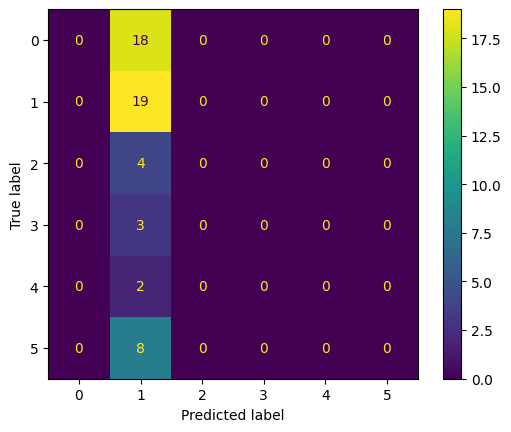

In [132]:
CONFUSION(df_results)

**85 / 15**

In [133]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_3_85 = nn.fit(sX_train85, 
                      y_train85, 
                      epochs = 35, 
                      batch_size = 32,
                      validation_data = (sX_test15, 
                                         y_test15))


Epoch 1/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.1882 - loss: 2.2235 - val_accuracy: 0.1212 - val_loss: 2.0556
Epoch 2/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.2046 - loss: 2.0063 - val_accuracy: 0.1818 - val_loss: 1.9767
Epoch 3/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.1834 - loss: 2.0224 - val_accuracy: 0.3333 - val_loss: 1.9247
Epoch 4/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.2705 - loss: 1.8822 - val_accuracy: 0.3636 - val_loss: 1.8849
Epoch 5/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.2893 - loss: 1.8198 - val_accuracy: 0.3636 - val_loss: 1.8471
Epoch 6/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.3218 - loss: 1.7607 - val_accuracy: 0.3939 - val_loss: 1.8191
Epoch 7/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.3732 - loss: 1.7474 - val_accuracy: 0.3939 - val_loss: 1.7970
Epoch 8/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.3817 - loss: 1.7785 - val_accuracy: 0.393

In [134]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(sX_test15), 
                   axis = 1)  

y_test = np.argmax(y_test15, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.67      0.17      0.27        12
           2       0.16      1.00      0.27         3
           3       0.40      1.00      0.57         2
           4       0.50      1.00      0.67         1
           5       1.00      0.75      0.86         4

    accuracy                           0.36        33
   macro avg       0.62      0.67      0.47        33
weighted avg       0.75      0.36      0.34        33



In [135]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,1,2
1,1,2
2,3,3
3,1,3
4,0,2
5,0,2
6,4,4
7,1,2
8,3,3
9,1,2


In [136]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



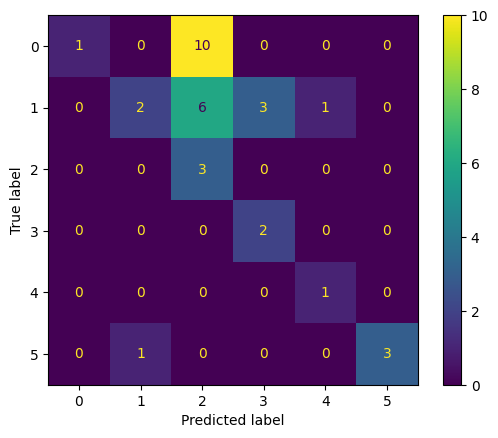

In [137]:
CONFUSION(df_results)

**90 / 10**

In [138]:
# Train the model on the resampled data

# reset weights;

nn.set_weights(initial_weights)

history_3_90 = nn.fit(rX_train90, 
                      y_train90, 
                      epochs = 35, 
                      batch_size = 32,
                      validation_data = (rX_test10, 
                                         y_test10))


Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.2023 - loss: 2.1490 - val_accuracy: 0.0909 - val_loss: 2.0306
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.1715 - loss: 2.1008 - val_accuracy: 0.0909 - val_loss: 1.9873
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.1765 - loss: 2.0442 - val_accuracy: 0.0909 - val_loss: 1.9565
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.1994 - loss: 2.0288 - val_accuracy: 0.1818 - val_loss: 1.9328
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.2378 - loss: 1.9745 - val_accuracy: 0.2273 - val_loss: 1.9200
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.2172 - loss: 1.9021 - val_accuracy: 0.2727 - val_loss: 1.9072
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.2309 - loss: 1.9423 - val_accuracy: 0.2727 - val_loss: 1.9012
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.2694 - loss: 1.8472 - val_accuracy: 0.3182 - 

In [139]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(nn.predict(rX_test10), 
                   axis = 1)  

y_test = np.argmax(y_test10, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       1.00      0.12      0.22         8
           2       0.17      0.50      0.25         2
           3       0.33      1.00      0.50         1
           4       0.50      1.00      0.67         1
           5       1.00      0.67      0.80         3

    accuracy                           0.45        22
   macro avg       0.58      0.64      0.50        22
weighted avg       0.71      0.45      0.44        22



In [140]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,4,4
1,0,0
2,1,4
3,1,0
4,1,0
5,0,0
6,3,3
7,1,2
8,1,1
9,5,3


In [141]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



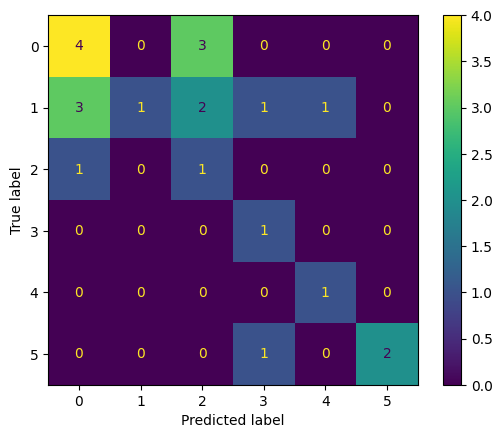

In [142]:
CONFUSION(df_results)

In [156]:
# Function to create the Keras model

def create_model(optimise = 'adam',
                 neurons = 64,
                 dropout_rate = 0.3,
                 target_col = resample75['Type']):
    
    model = Sequential()

    # Input layer and first hidden layer with ReLU activation
    
    model.add(Dense(neurons, 
                    input_dim = rX_train75_1.shape[1],
                    activation = 'relu'))
    
    # add Dropout to prevent overfitting
    
    model.add(Dropout(dropout_rate))

    # Output layer (for multi-class classification)
    
    model.add(Dense(len(np.unique(target_col)), 
                    activation = 'softmax'))
    
    # Compile the model
    
    model.compile(optimizer = optimise,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

# **CROSS VALIDATION (K-Fold)**

In [144]:
features

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [145]:
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,6
210,6
211,6
212,6


<Axes: ylabel='count'>

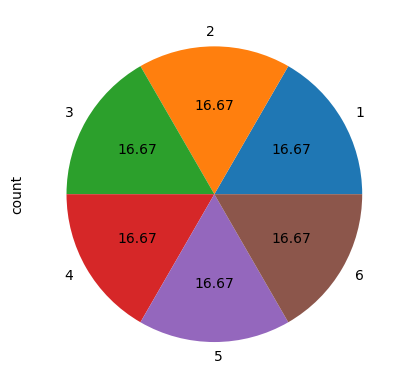

In [146]:
X, y = smote.fit_resample(features, target)

# ...and the new distribution is displayed with a pie chart;

y['Type'].value_counts().plot.pie(autopct = '%.2f')

In [149]:
# test target set is one-hot encoded to create a multi-class classification
# target...

# convert {1 based} class labels to {0 based} class labels;

y -= 1

# convert the resulting DataFrame to a numpy array;

y = y.to_numpy()

# Ensure the array is 1D

y = y.flatten() 

# Convert the labels to one-hot encoding

y = ONEHOT_ENCODE(y)

# Check the resulting shape of y_test25
print(y.shape)

(456, 6)


In [151]:
X = X.to_numpy()

print(X.shape)

(456, 9)


In [163]:
cross_validate = KFold(n_splits = 5, 
                       shuffle = True,
                       random_state = 42)

# Lists to store the results

cv_scores = []

# Perform cross-validation

for train_index, val_index in cross_validate.split(X, y):
    
    # Split data into train and validation sets for the current fold
    
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create and train a new model
    
    model = create_model()  
    
    model.fit(X_train, 
              y_train, 
              epochs = 10,
              batch_size = 32, 
              verbose = 1)
    
    # Evaluate the model on the validation set
    
    val_loss, val_acc = model.evaluate(X_val,
                                       y_val, 
                                       verbose = 0)
    
    cv_scores.append(val_acc)  # Store the accuracy of each fold

# Print the cross-validation results

print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores)}')

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2109 - loss: 11.9648
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2214 - loss: 9.5541 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1980 - loss: 9.2417 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1633 - loss: 8.5122 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1757 - loss: 8.3476 
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1919 - loss: 7.9234
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.1809 - loss: 7.3651
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1907 - loss: 7.4841
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1641 - loss: 6.5086
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2046 - loss: 6.1560
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1519 - loss: 14.7130
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accur

# **HYPERPARAMETER OPTIMISATION**

In [164]:
# clear session;

K.clear_session(free_memory = True)

# instantiate {KerasClassifier()} wrapper to variable {model};

model = KerasClassifier(model = create_model, 
                        verbose = 0)

print(model.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [165]:
# Wrap the Keras model to use in RandomizedSearchCV

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        optimizer = ['adam', 'rmsprop', 'sgd'],  # Optimizers to try
                        neurons = [32, 64, 128],  # Number of neurons in each hidden layer
                        dropout_rate = [0.2, 0.3, 0.4],  # Dropout rate values
                        batch_size = [16, 32, 64],  # Batch sizes to try
                        epochs = [10, 20, 50])
                            

# check for acceptable parameters 

print(model.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'neurons', 'dropout_rate', 'class_weight'])


In [166]:
# early stopping will be utilised to mitigate model overfitting 
# that may result from an overabundance of epochs;

# {EarlyStopping()} object is instantiated to variable {es},
# parameter {monitor} is set to {'val_loss'} to moniter when
# value loss metric ceases to decrease; 

es = EarlyStopping(monitor = 'val_loss',

                   # parameter {patience} is set to 5, setting a threshold
                   # of (5) epochs wherein if no improvement is seen in 
                   # the previously specified {monitor} metric the training
                   # will terminate;
                   
                   patience = 3,

                   # parameter {restore_best_weighs} is set to {True} to return
                   # the model's weights from the epoch featuring the best value
                   
                   restore_best_weights = True)

In [167]:
# instantiate hyperparameter grid as a dictionary to variable {param_grid}
# to enable the randomized search...

                            # adam, stochastic gradient descent and 
                            # root-mean-squared optimizers will be
                            # utilised during each search configuration;

param_grid = dict(optimizer = ['adam', 'rmsprop', 'sgd'],  

                  # the network will be trained with 
                  # each of the following neuron count
                  # configurations;
                  
                  neurons = [32, 64, 128], 

                  # the randomized search will experiment
                  # with the following different dropout rates;
                  
                  dropout_rate = [0.2, 0.3, 0.4],  

                  # the following batch sizes will be 
                  # utilised during the search;
                  
                  batch_size = [16, 32, 64],

                  # training sets will be conducted
                  # using each of the following epoch counts;
                  
                  epochs = [10, 20, 50], 

                  # metric {'accuracy'} will be used to 
                  # determine model performance levels;
                  
                  metrics = ['accuracy'], 

                  # eager execution is enabled;
                  
                  run_eagerly = [True])  


# instantiate {RandomizedSearchCV()} object to variable {random_search};

                                   # the neural network model
                                   # is assigned to parameter {estimator};

random_search = RandomizedSearchCV(estimator = model, 

                                   # each parameter distribution is 
                                   # configured through the {param_grid{}}
                                   # dictionary;
                                   
                                   param_distributions = param_grid, 

                                   # 10 different iterations will be performed
                                   # per fold;
                                   
                                   n_iter = 10, 

                                   # configurations will be tested on 
                                   # 3 seperate cross-validation splits;
                                   
                                   cv = 3, 
                                   verbose = 1, 
                                   random_state = 42,
                                   error_score = 'raise',

                                   # parallelization is used to increase
                                   # search speed by executing the task
                                   # on all available cores;
                                   
                                   n_jobs = -1)

# assign the optimal model found by the random_search
# to variable {random_search_result}

                                     # fit the training sets;

random_search_result = random_search.fit(rX_train75_1, y_train75_1, 

                                         # fit testing sets as validation data;
                                         
                                         validation_data = (rX_test25_1, y_test25_1), 

                                         # fit the model with early stopping;
                                         
                                         callbacks = [es])

# display the optimal hyperparameters;

print("Best Hyperparameters Found: ", random_search_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters Found:  {'run_eagerly': True, 'optimizer': 'adam', 'neurons': 128, 'metrics': 'accuracy', 'epochs': 50, 'dropout_rate': 0.2, 'batch_size': 16}


In [168]:
print(random_search_result.best_estimator_)

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x00000219EA641BC0>
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=accuracy
	batch_size=16
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=True
	epochs=50
	neurons=128
	dropout_rate=0.2
	class_weight=None
)


In [169]:
help(create_model)

Help on function create_model in module __main__:

create_model(optimise='adam', neurons=64, dropout_rate=0.3, target_col=0      1
1      4
2      2
3      6
4      2
      ..
337    6
338    6
339    6
340    6
341    6
Name: Type, Length: 342, dtype: int64)



In [172]:
# optimal model is instantiated to {optimal_nn} 
# by assigning the newly found optimal hyperparameters
# to {create_model()} function;

optimal_nn = create_model(optimise = 'adam',
                          neurons = 128,
                          dropout_rate = 0.2,
                          target_col = resample75['Type'])

optimal_nn.summary()

# Train the model on the resampled data

history = optimal_nn.fit(rX_train75_2, 
                         y_train75_2,
                         epochs = 50, 
                         batch_size = 16,
                         validation_data = (rX_test25_2, y_test25_2),
                         callbacks = [es])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,054 (8.02 KB)

 Trainable params: 2,054 (8.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.1130 - loss: 1.8798 - val_accuracy: 0.3519 - val_loss: 1.6618
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4448 - loss: 1.5933 - val_accuracy: 0.3889 - val_loss: 1.5211
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6034 - loss: 1.3892 - val_accuracy: 0.4259 - val_loss: 1.4206
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6583 - loss: 1.2365 - val_accuracy: 0.5185 - val_loss: 1.3354
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7394 - loss: 1.0529 - val_accuracy: 0.5185 - val_loss: 1.2685
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7212 - loss: 1.0044 - val_accuracy: 0.5926 - val_loss: 1.2051
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7450 - loss: 0.9430 - val_accuracy: 0.5741 - val_loss: 1.1599
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7417 - loss: 0.8089 - val_accuracy: 0.5556 - v

In [173]:
loss, accuracy = optimal_nn.evaluate(rX_test25_2, y_test25_2)
print(f'Final Model Accuracy on Test Set: {accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6983 - loss: 0.8812
Final Model Accuracy on Test Set: 0.7037


In [174]:
# predict on the test set utilising the neural network...

# convert the one-hot encoded vectors to single
# digits;

y_pred = np.argmax(optimal_nn.predict(rX_test25), 
                   axis = 1)  

y_test = np.argmax(y_test25, 
                   axis = 1)

# evaluate performance with a classification report;

print(classification_report(y_test, 
                            y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.77      0.53      0.62        19
           2       0.30      0.75      0.43         4
           3       1.00      1.00      1.00         3
           4       0.50      0.50      0.50         2
           5       0.88      0.88      0.88         8

    accuracy                           0.70        54
   macro avg       0.70      0.74      0.70        54
weighted avg       0.76      0.70      0.71        54



#### the network generalises well to classes **[0, 5]**,
#### generalisation to classes **[1, 4]** is average,
#### the network generalises poorly to class **[2]**
#### the network overfits to class **[3]**

In [175]:
# store both arrays in dictionary {nn_results};

nn_results = {'Actual Values': list(y_test),
              'Predicted Values': list(y_pred)}

# create a pandas DataFrame with function {pd.DataFrame()}
# to compare the actual values with the predicted values;

df_results = pd.DataFrame(nn_results)

df_results

,Actual Values,Predicted Values
0,0,0
1,2,2
2,5,5
3,1,2
4,5,5
5,1,1
6,5,5
7,0,0
8,1,2
9,0,0


In [176]:
help(CONFUSION)

Help on function CONFUSION in module __main__:

CONFUSION(dataset)
    .

    CREATES A CONFUSION MATRIX FOR THE PURPOSE OF EVALUATING
    CLASSIFICATION ML MODELS, ACCEPTS A PANDAS DATAFRAME AS INPUT.

    NOTE: ENSURE DATAFRAME CONTAINS ONLY TWO COLUMNS NAMED EXPLICITLY AS
    'Actual Values' and 'Predicted Values'



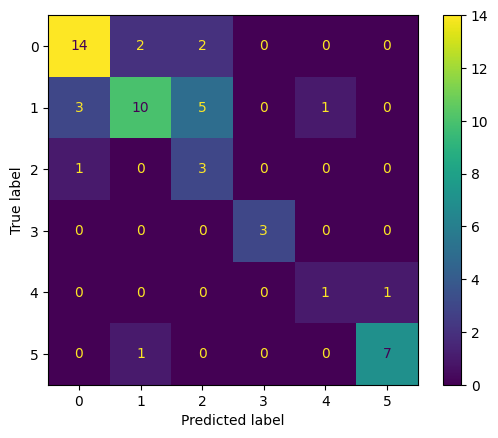

In [177]:
CONFUSION(df_results)

- _The final model performs well with predicting classes [0, 1, 5]_
- _There were no false positive predictions for class [3]_
- _The model struggles to discern between classes [0, 1] at times however_
- _The model also struggles to discern between classes [0, 2]_
- _The model only predicted one correct instance of class [4]_